# Import packages

In [2]:

%load_ext autoreload
%autoreload 2

from pathlib import Path
import os
if Path.cwd().parts[-1] != 'Multifirefly-Project':
    if Path.cwd().parts[-1] != 'notebooks':
        os.chdir('..')
    from add_path import find_path
    current_path = find_path()
    os.chdir(current_path)

from data_wrangling import specific_utils, process_monkey_information, general_utils
from pattern_discovery import pattern_by_trials, pattern_by_trials, cluster_analysis, organize_patterns_and_features
from visualization.matplotlib_tools import plot_behaviors_utils
from neural_data_analysis.neural_analysis_tools.get_neural_data import neural_data_processing
from neural_data_analysis.neural_analysis_tools.visualize_neural_data import plot_neural_data, plot_modeling_result
from neural_data_analysis.neural_analysis_tools.model_neural_data import transform_vars, neural_data_modeling, drop_high_corr_vars, drop_high_vif_vars
from neural_data_analysis.neural_analysis_by_topic.neural_vs_behavioral import prep_monkey_data, prep_target_data, neural_vs_behavioral_class
from neural_data_analysis.neural_analysis_by_topic.planning_and_neural import planning_neural_class, pn_utils, pn_helper_class
from neural_data_analysis.neural_analysis_tools.cca_methods import cca_class
from neural_data_analysis.neural_analysis_tools.cca_methods import cca_class, cca_utils, cca_cv_utils
from neural_data_analysis.neural_analysis_tools.cca_methods.cca_plotting import cca_plotting, cca_plot_lag_vs_no_lag, cca_plot_cv
from machine_learning.ml_methods import regression_utils, ml_methods_utils, regz_regression_utils, ml_methods_class, classification_utils, ml_plotting_utils


import sys
import math
import gc
import subprocess
from pathlib import Path
from importlib import reload

# Third-party imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from scipy import linalg, interpolate
from scipy.signal import fftconvolve
from scipy.io import loadmat
from scipy import sparse
import torch
from numpy import pi

# Machine Learning imports
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.multivariate.cancorr import CanCorr

# Neuroscience specific imports
import neo
import rcca

plt.rcParams["animation.html"] = "html5"
os.environ['KMP_DUPLICATE_LIB_OK']='True'
rc('animation', html='jshtml')
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['animation.embed_limit'] = 2**128
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)
print("done")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Changed the directory to 'Multifirefly-Project'.
Added /Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/methods to the path.
done
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# exp

In [25]:
pn.test_data_inst.stops_near_ff_df

cur_ff_index  stop_point_index  CUR_point_index_ff_first_seen_bbas  \
0              1              1500                          1380.00000   
1              2              1767                          1652.00000   
2              8              2924                          2814.00000   
3              9              3073                          2986.00000   
4             11              3441                          3414.00000   
5             27              7127                          7087.00000   
6             29              7447                          7332.00000   
7             35              8810                          8783.00000   
8             37              8923                          8884.00000   
9             57             13888                         13795.00000   
10            58             13977                         13928.00000   
11            61             15171                         15064.00000   
12            68             17529                         17487.00000   
13            70             18199                         18178.00000   
14            76             20048                         19928.00000   
15            80             20230                         20175.00000   
16            81             20363                         20297.00000   
17            89             22106                         21991.00000   
18            95             24450                         24367.00000   
19            99             25890                         25801.00000   
20           100             26033                         25998.00000   
21           106             27407                         27311.00000   
22           109             28094                         27974.00000   
23           111             28436                         28354.00000   
24           112             28591                         28471.00000   
25           123             30971                         30889.00000   
26           124             31041                         30964.00000   
27           126             32105                         32018.00000   
28           130             35586                         35519.00000   
29           140             41837                         41726.00000   
30           144             42974                         42916.00000   
31           153             44992                         44948.00000   
32           162             48242                         48189.00000   
33           164             49131                         49011.00000   
34           174             54130                         54093.00000   
35           181             56810                         56749.00000   
36           191             60429                         60363.00000   
37           199             63411                         63383.00000   
38           200             63591                         63523.00000   
39           202             63905                         63842.00000   
40           210             65410                         65290.00000   
41           211             65620                         65584.00000   
42           221             68810                         68771.00000   
43           222             68961                         68895.00000   
44           224             69480                         69412.00000   
45           229             70478                         70388.00000   
46           231             71018                         70987.00000   
47           245             74229                         74129.00000   
48           255             79188                         79077.00000   
49           265             83166                         83145.00000   
50           269             84076                         83956.00000   
51           274             85224                         85137.00000   
52           282             87611                         87587.00000   
53      

In [24]:
pn.test_data_inst.nxt_ff_df

stop_point_index  stop_time  stop_cum_distance  ff_index  \
0               1500   25.01125         3107.85726         2   
1               1767   29.41040         3530.99760         3   
2               2924   48.50003         7352.35279         9   
3               3073   50.94039         7620.47521        10   
4               3441   56.98268         8140.49665        12   
5               7127  117.78773        21665.22268        28   
6               7447  123.03333        22254.12086        30   
7               8810  145.55923        27415.43129        36   
8               8923  147.40180        27609.81114        38   
9              13888  229.37174        45740.40894        58   
10             13977  230.81592        45806.01454        59   
11             15171  250.55318        50307.67275        62   
12             17529  289.49638        59106.85193        69   
13             18199  300.56847        62686.16065        71   
14             20048  331.09548        69837.19181        77   
15             20230  334.05030        70073.55062        81   
16             20363  336.22480        70288.73415        82   
17             22106  364.94255        78929.00241        90   
18             24450  403.70314        88749.94522        96   
19             25890  427.49070        92916.24822       100   
20             26033  429.83130        93197.08744       101   
21             27407  452.45682        97497.80788       107   
22             28094  463.76129        98595.95022       110   
23             28436  469.37207        99397.78564       112   
24             28591  471.91178        99620.88537       113   
25             30971  511.08744       105099.29408       124   
26             31041  512.21623       105195.49062       125   
27             32105  529.82866       107963.18615       127   
28             35586  588.45922       120237.58864       131   
29             41837  696.88922       154863.22426       141   
30             42974  715.64703       158593.65408       145   
31             44992  748.91306       164133.67514       154   
32             48242  802.59700       172369.97648       163   
33             49131  817.32101       176383.99522       165   
34             54130  900.03806       189545.89063       175   
35             56810  944.35937       196925.53803       182   
36             60429 1004.20178       210550.73745       192   
37             63411 1053.51990       219852.12402       200   
38             63591 1056.47463       220209.97036       201   
39             63905 1061.62063       220730.83668       203   
40             65410 1086.40408       227232.39802       211   
41             65620 1089.85686       227620.39477       212   
42             68810 1142.52813       238260.72428       222   
43             68961 1145.00149       238503.39912       223   
44             69480 1153.56697       241377.73478       225   
45             70478 1170.01744       244057.76040       230   
46             71018 1178.91486       245168.27762       232   
47             74229 1231.81851       256958.03429       246   
48             79188 1313.85494       267357.64051       256   
49             83166 1379.67317       283790.49150       266   
50             84076 1394.69597       287076.13284       270   
51             85224 1413.58661       289019.62372       275   
52             87611 1452.97792       295492.11345       283   
53             90916 1507.59134       305286.63204       292   
54             91783 1521.93375       307570.03302       294   
55             92780 1538.43386       310193.37811       296   
56             92997 1542.00277       310521.11671       297   
57             97659 1618.99280       322600.76366       313   
58             99333 1646.59831       326304.10769       320   
59            100364 1663.66286       328678.34140       322   
60            102875 1705.09603       333759.74245       331   
61            103838 1720.99868     

# Retrieve data

## get data

In [3]:
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0330"

In [4]:
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Schro/data_0416"

In [5]:
reduce_y_var_lags = True
planning_data_by_point_exists_ok = True
y_data_exists_ok = True

ref_point_mode='time after cur ff visible'
ref_point_value=0.1
normalize = False
eliminate_outliers = False
use_curv_to_ff_center = False
curv_of_traj_mode = 'distance'
window_for_curv_of_traj=[-25, 25]
truncate_curv_of_traj_by_time_of_capture = True

pn = planning_neural_class.PlanningAndNeural(raw_data_folder_path=raw_data_folder_path)
pn.prep_data_to_analyze_planning(planning_data_by_point_exists_ok=planning_data_by_point_exists_ok)
pn.planning_data_by_point, cols_to_drop = general_utils.drop_columns_with_many_nans(
    pn.planning_data_by_point)
pn.get_x_and_y_data_for_modeling(exists_ok=y_data_exists_ok, reduce_y_var_lags=reduce_y_var_lags)

Loaded binned_spikes_df from all_monkey_data/processed_neural_data/monkey_Schro/data_0416/binned_spikes_df_0p1.csv
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Failed to retrieve shared_stops_near_ff_df; will make new shared_stops_near_ff_df
Retrieved ff_dataframe from all_monkey_data/processed_data/monkey_Schro/data_0416/ff_dataframe.h5
Making shared_stops_near_ff_df...
37 rows out of 470 rows were removed from closest_stop_to_capture_df because the distance between stop and ff center is larger than 25cm, 
finding captured_ff_info...
27 rows out of 379 rows in captured_ff_info were dropped because they are within n seconds before or after crossing boundary.
20 rows out of 352 rows were removed from all_nxt_ff_df because the time between stop and next stop is less than 0.1 seconds
2 rows out of 332 rows were not used from all_nxt_ff_df because the distance b

## compare dist of every var

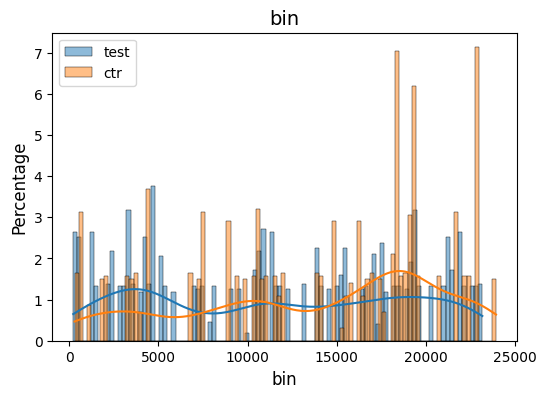

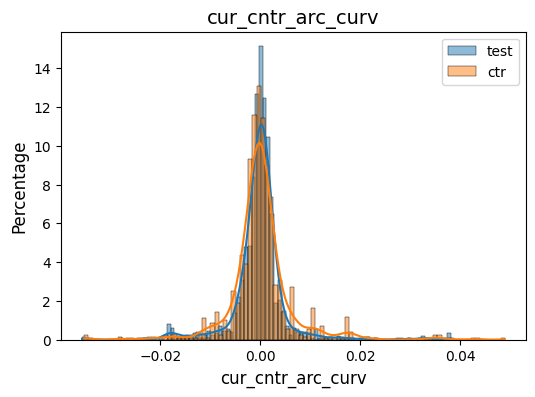

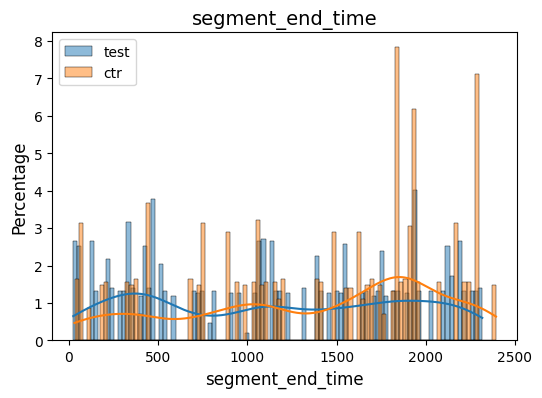

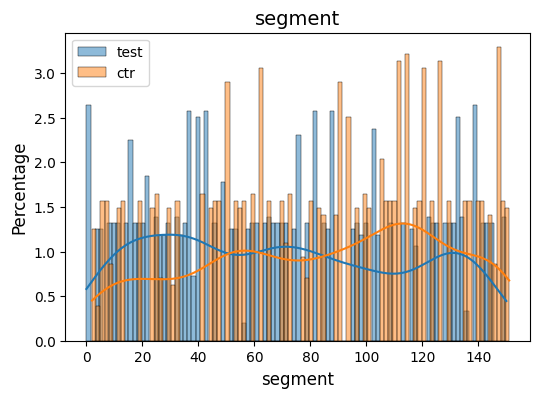

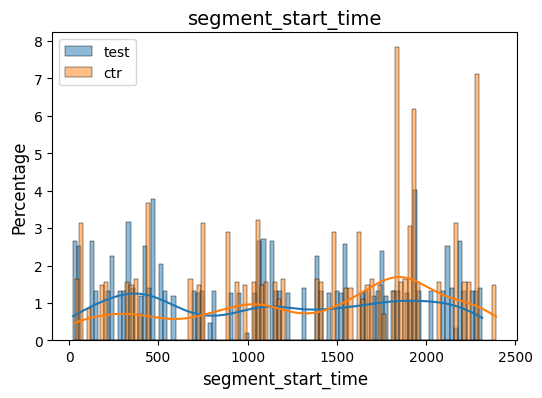

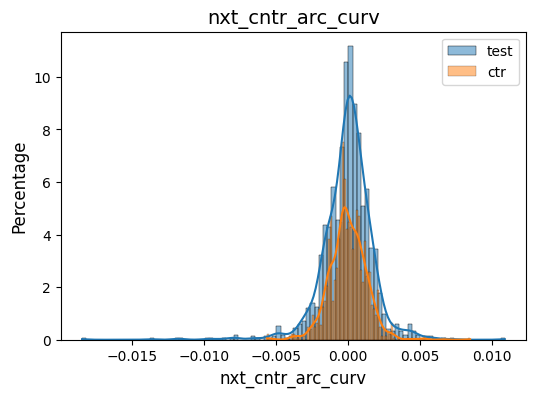

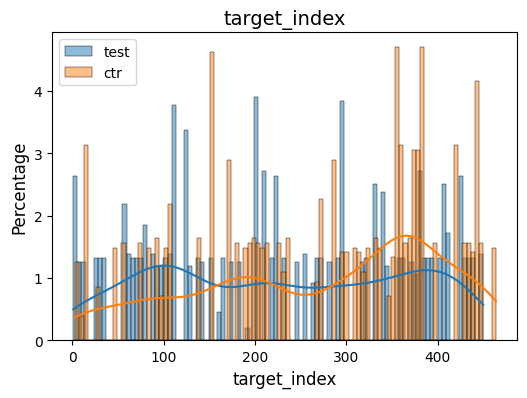

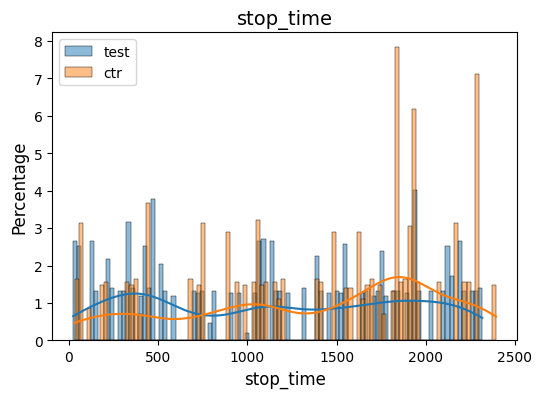

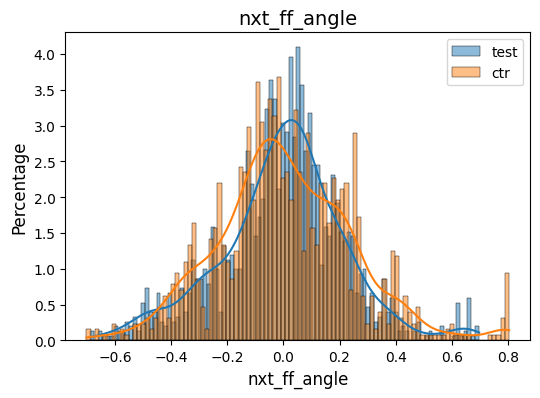

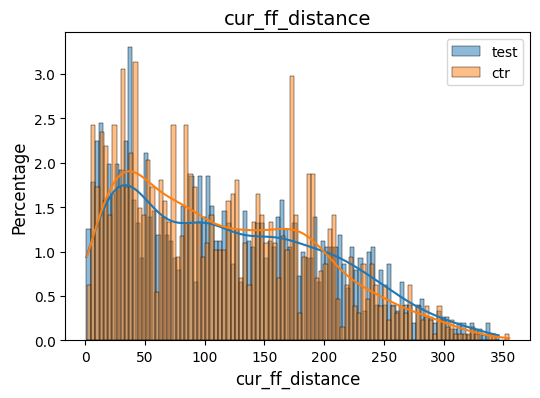

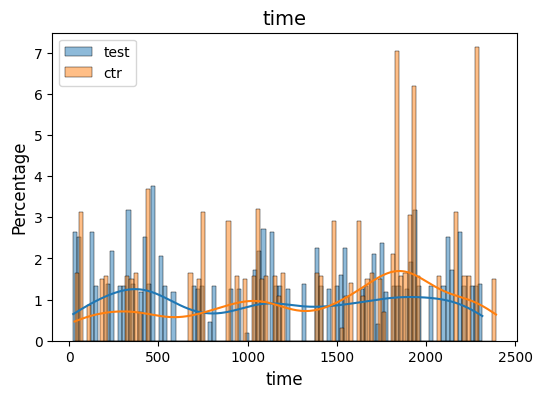

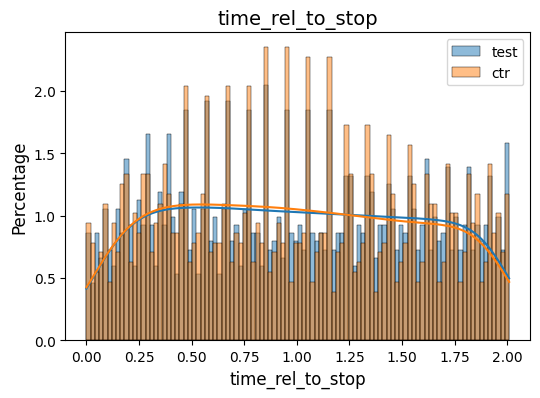

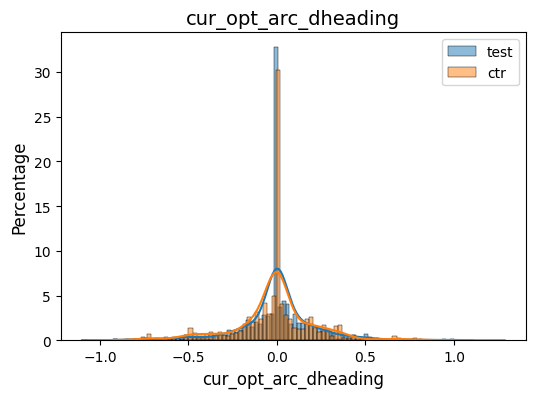

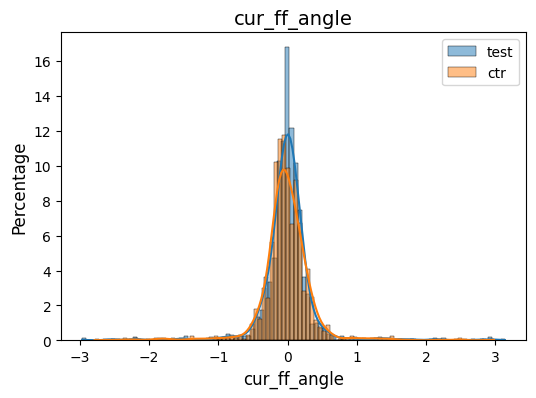

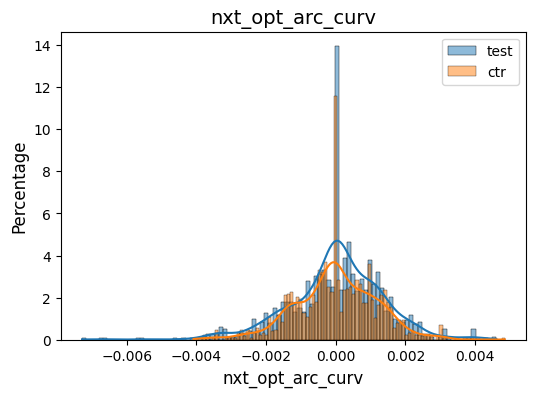

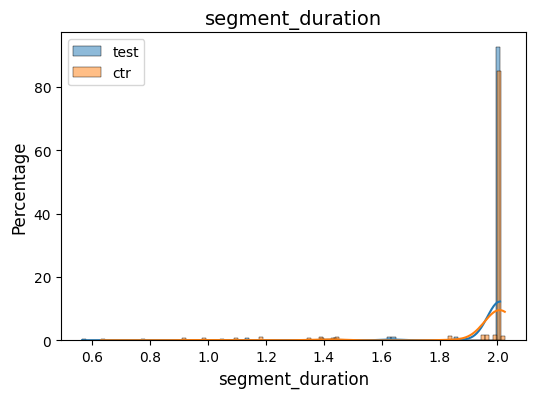

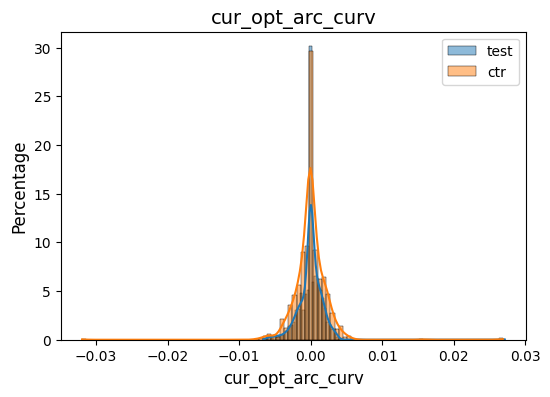

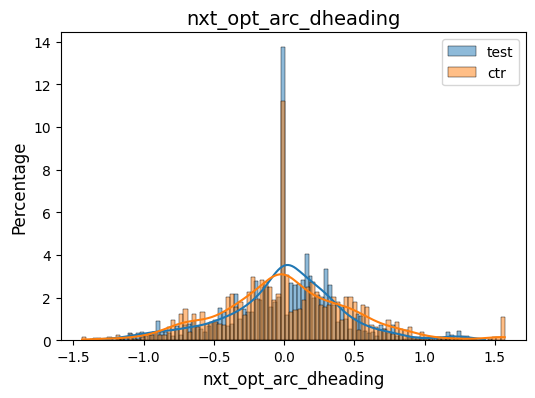

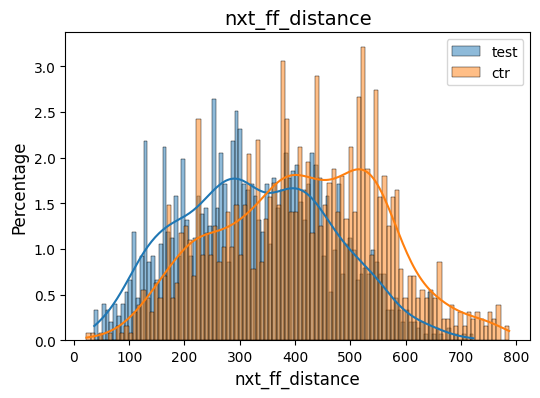

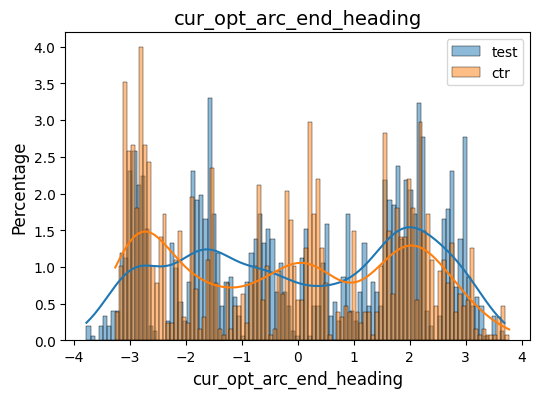

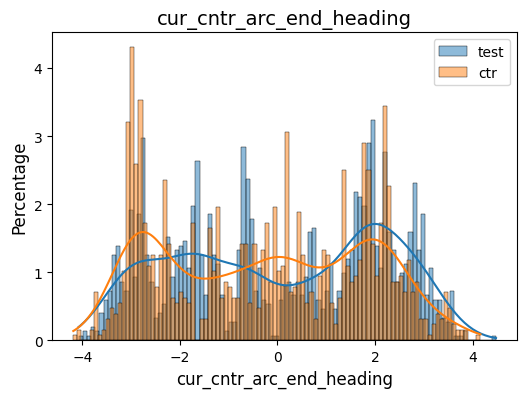

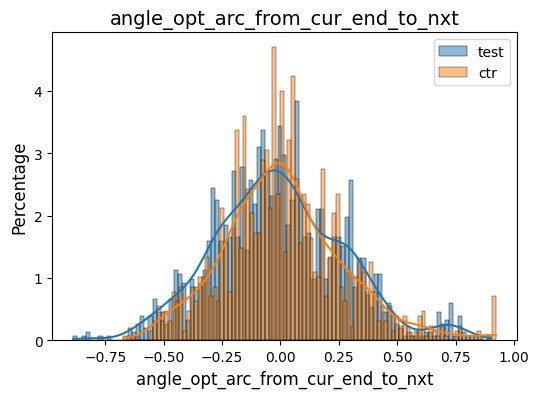

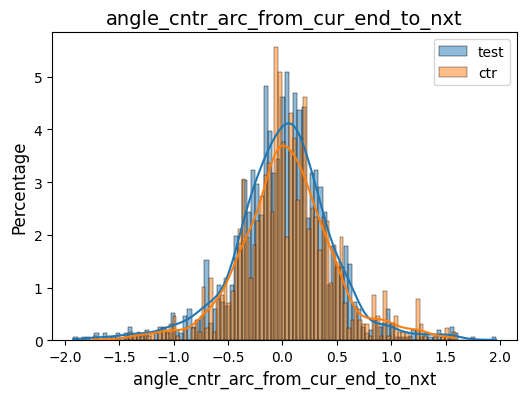

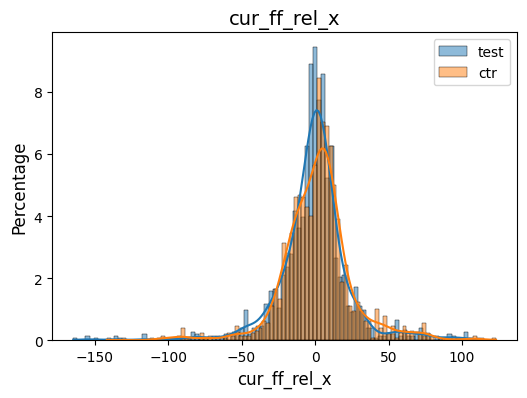

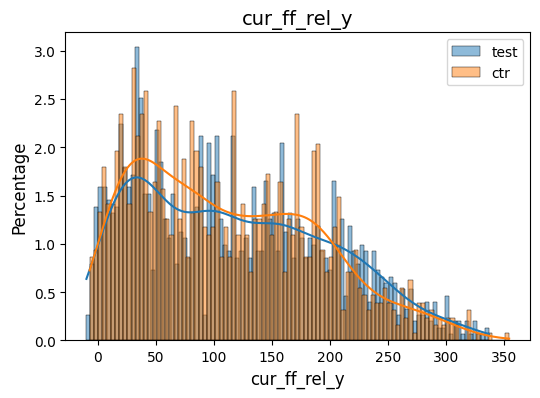

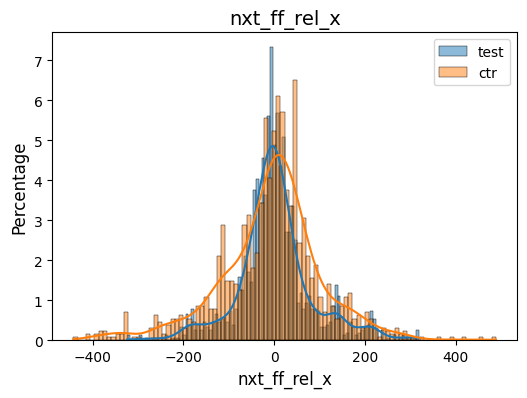

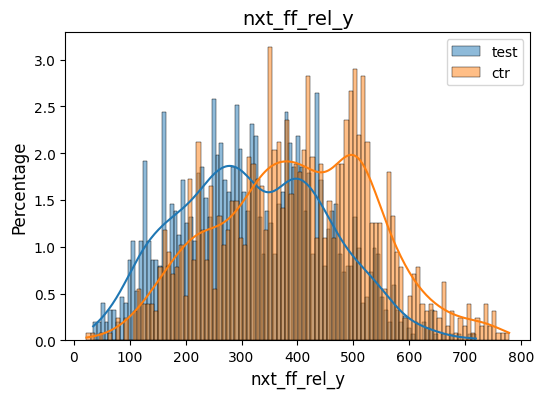

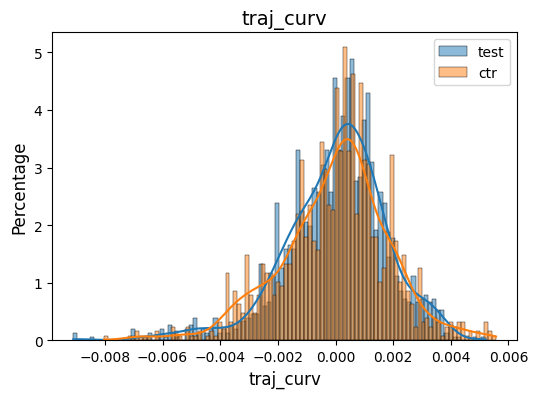

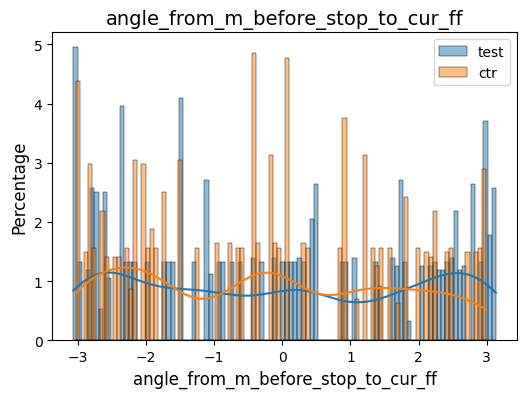

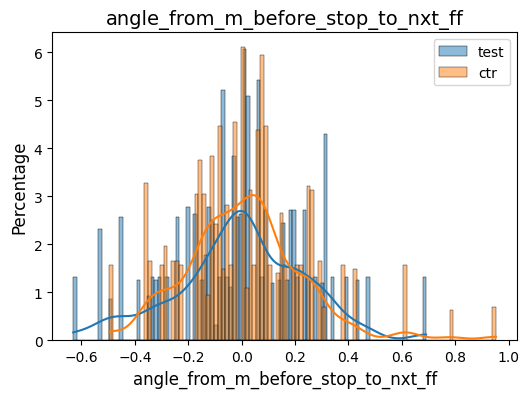

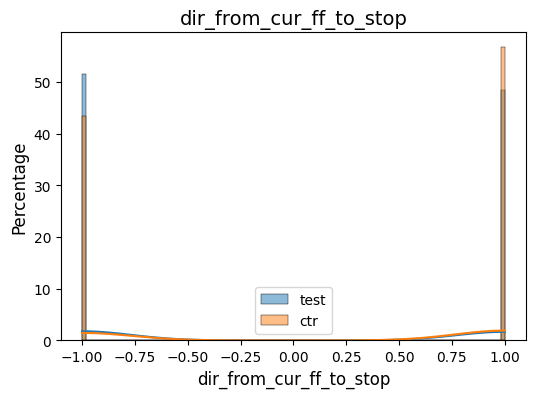

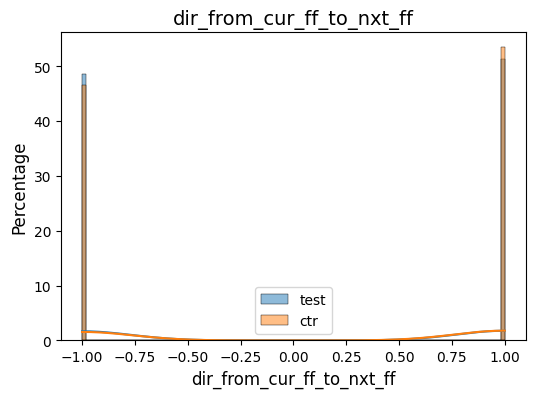

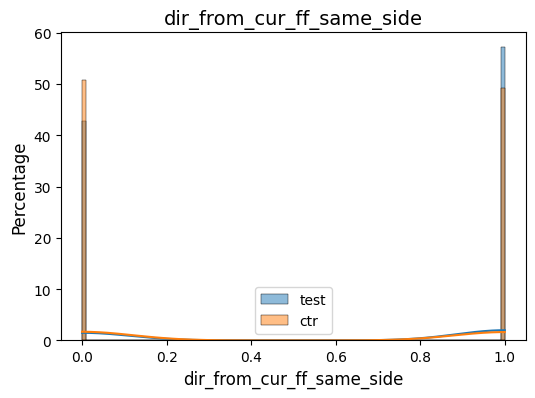

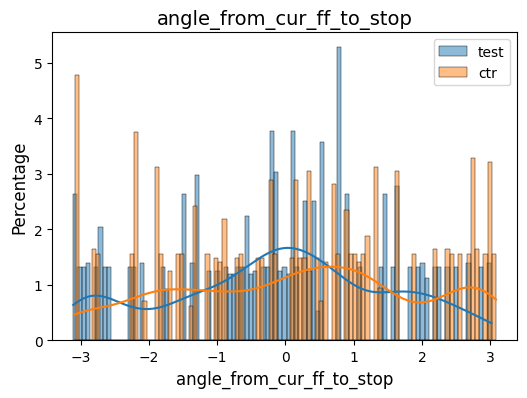

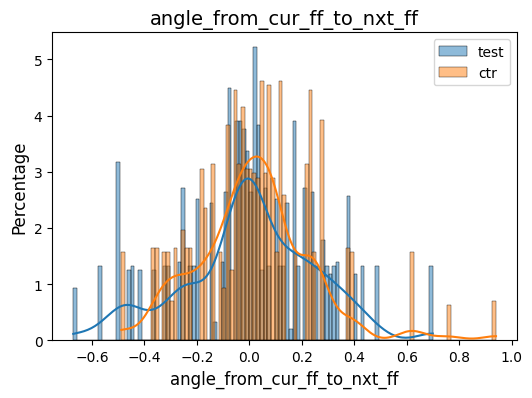

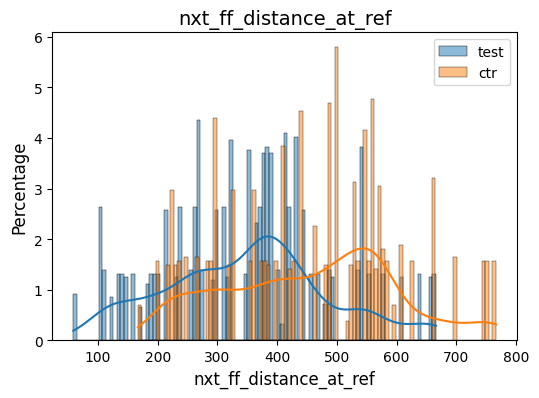

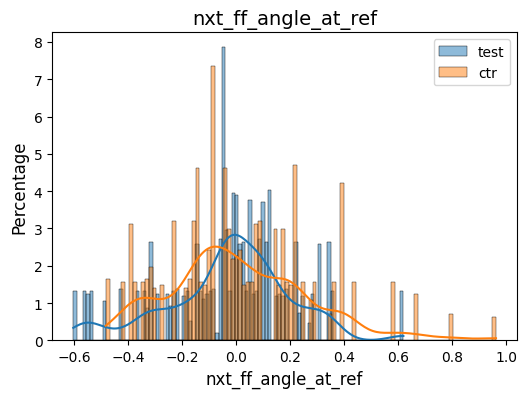

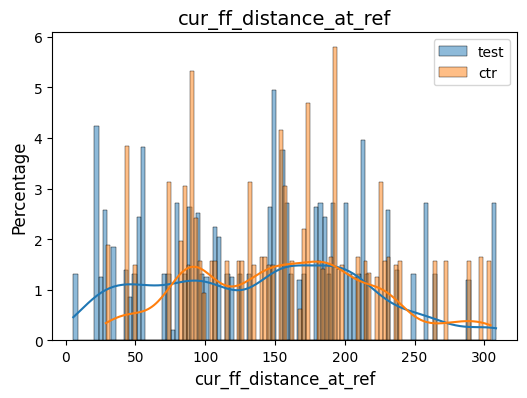

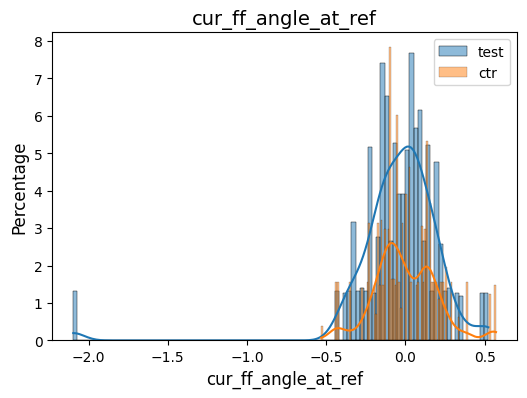

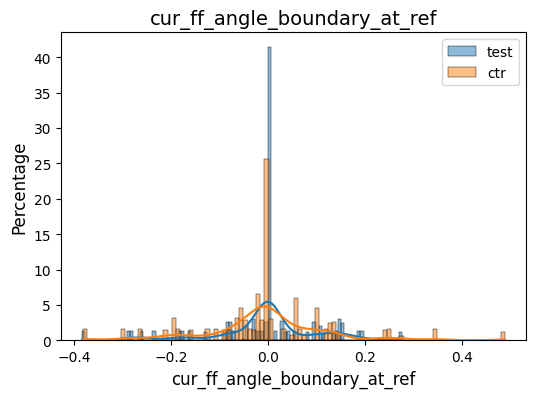

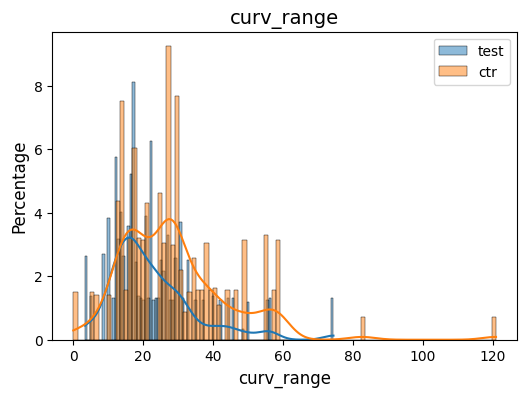

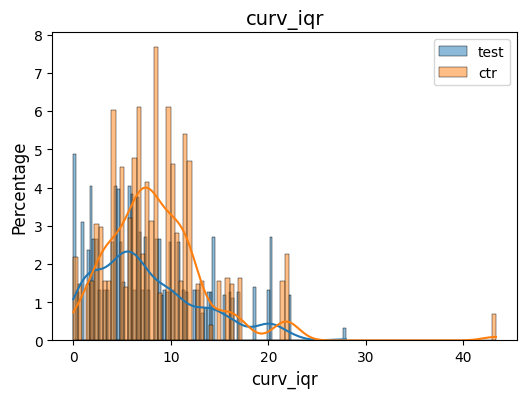

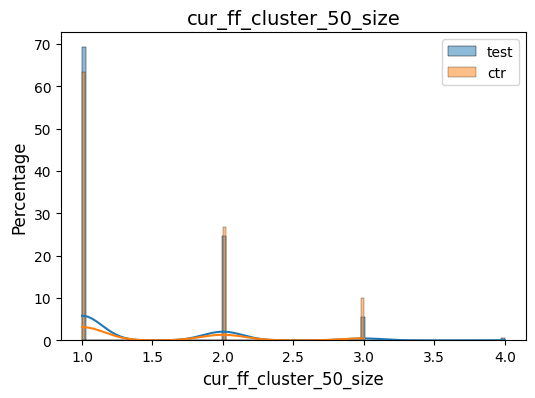

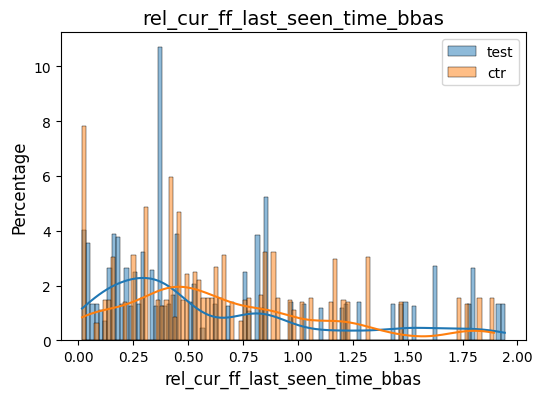

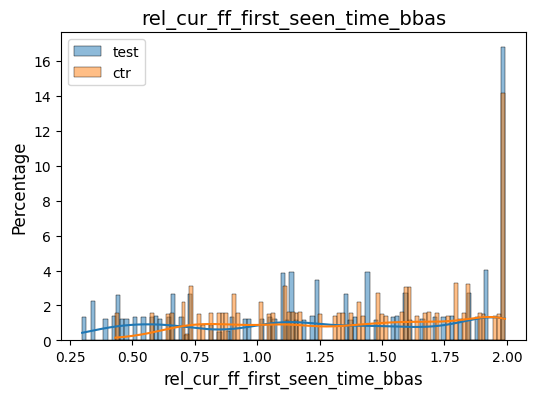

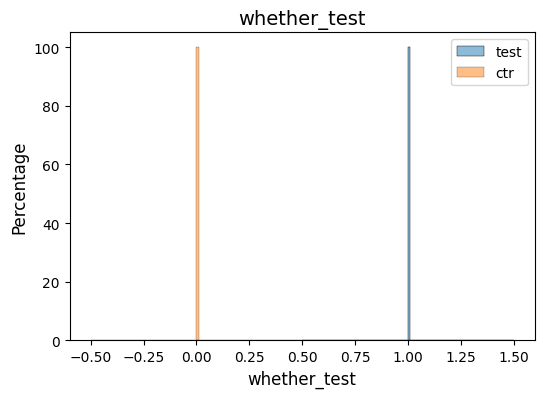

In [6]:
test_data = pn.y_var[pn.y_var['whether_test'] == 1]
ctr_data = pn.y_var[pn.y_var['whether_test'] == 0]

for col in test_data.columns:
#for col in ['target_index']:
    # compare the distribution through histplot (by percentage) of the column in test_data and ctr_data
    plt.figure(figsize=(6, 4))
    sns.histplot(test_data[col].values, label='test', alpha=0.5, stat='percent', kde=True, bins=100)
    sns.histplot(ctr_data[col].values, label='ctr', alpha=0.5, stat='percent', kde=True, bins=100)
    plt.title(f'{col}', fontsize=14)
    plt.xlabel(f'{col}', fontsize=12)
    plt.ylabel('Percentage', fontsize=12)
    plt.legend()
    plt.show()
    

## check NA

In [7]:
general_utils.check_na_in_df(pn.planning_data_by_point)


NA Values Analysis for DataFrame (17,519 rows)

Number of rows with at least one NA value: 630

Columns with NA values:
------------------------------------------------------------
cur_cntr_arc_curv                             509 (   2.9%)
nxt_cntr_arc_curv                             130 (   0.7%)
nxt_opt_arc_curv                              130 (   0.7%)
cur_opt_arc_curv                              509 (   2.9%)
cur_opt_arc_end_heading                       508 (   2.9%)
cur_cntr_arc_end_heading                      508 (   2.9%)
angle_opt_arc_from_cur_end_to_nxt             629 (   3.6%)
angle_cntr_arc_from_cur_end_to_nxt            629 (   3.6%)
------------------------------------------------------------


(       cur_cntr_arc_curv  segment_end_time  segment  segment_start_time  \
 244              0.00481          31.90023        2            29.89175   
 245              0.00481          31.90023        2            29.89175   
 246              0.00481          31.90023        2            29.89175   
 247              0.00481          31.90023        2            29.89175   
 248              0.00481          31.90023        2            29.89175   
 ...                  ...               ...      ...                 ...   
 17514                NaN        2393.73961      151          2391.73106   
 17515                NaN        2393.73961      151          2391.73106   
 17516                NaN        2393.73961      151          2391.73106   
 17517                NaN        2393.73961      151          2391.73106   
 17518                NaN        2393.73961      151          2391.73106   
 
        nxt_cntr_arc_curv  target_index  stop_time  nxt_ff_angle  \
 244              

## var's corr

In [8]:
nxt_cols = [col for col in pn.y_var.columns if 'nxt' in col]
corr_df = pn.y_var.corr()[nxt_cols]

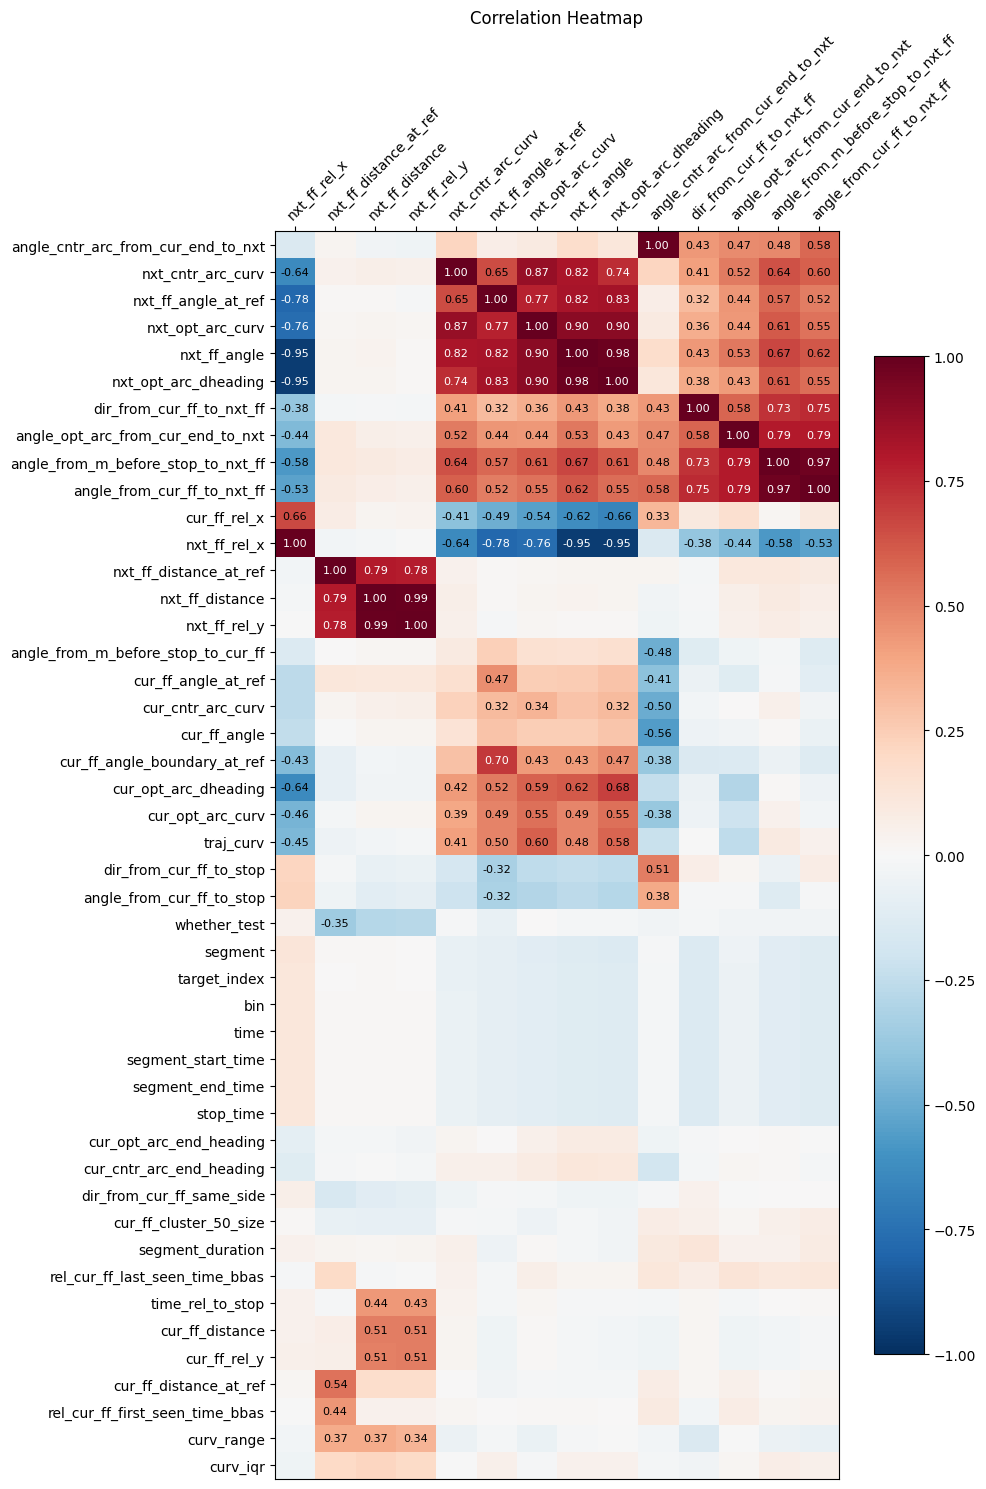

In [9]:
ml_plotting_utils.plot_correlation_heatmap(corr_df)

# LR: on all data together

### Just nxt ff vars

In [10]:
columns_of_interest = ['whether_test']

In [11]:
columns_of_interest = [col for col in pn.y_var.columns if 'nxt' in col]

In [12]:
x_var, y_var = pn.get_x_and_y_var_for_lr(test_or_control='test', use_x_var_lags=True)

y_var_sub = y_var[columns_of_interest]
# With x var lags
y_var_lr_df = neural_data_modeling.get_y_var_lr_df(
    x_var, y_var_sub, verbose=True)

nxt_cntr_arc_curv r: 0.838, r_squared: 0.703, p_values: 0.0
nxt_ff_angle r: 0.857, r_squared: 0.735, p_values: 0.0
nxt_opt_arc_curv r: 0.848, r_squared: 0.719, p_values: 0.0
nxt_opt_arc_dheading r: 0.866, r_squared: 0.749, p_values: 0.0
nxt_ff_distance r: 0.883, r_squared: 0.78, p_values: 0.0
angle_opt_arc_from_cur_end_to_nxt r: 0.83, r_squared: 0.69, p_values: 0.0
angle_cntr_arc_from_cur_end_to_nxt r: 0.847, r_squared: 0.717, p_values: 0.0
nxt_ff_rel_x r: 0.862, r_squared: 0.743, p_values: 0.0
nxt_ff_rel_y r: 0.879, r_squared: 0.773, p_values: 0.0
angle_from_m_before_stop_to_nxt_ff r: 0.829, r_squared: 0.687, p_values: 0.0
dir_from_cur_ff_to_nxt_ff r: 0.863, r_squared: 0.744, p_values: 0.0
angle_from_cur_ff_to_nxt_ff r: 0.833, r_squared: 0.694, p_values: 0.0
nxt_ff_distance_at_ref r: 0.834, r_squared: 0.696, p_values: 0.0
nxt_ff_angle_at_ref r: 0.83, r_squared: 0.689, p_values: 0.0


## plot

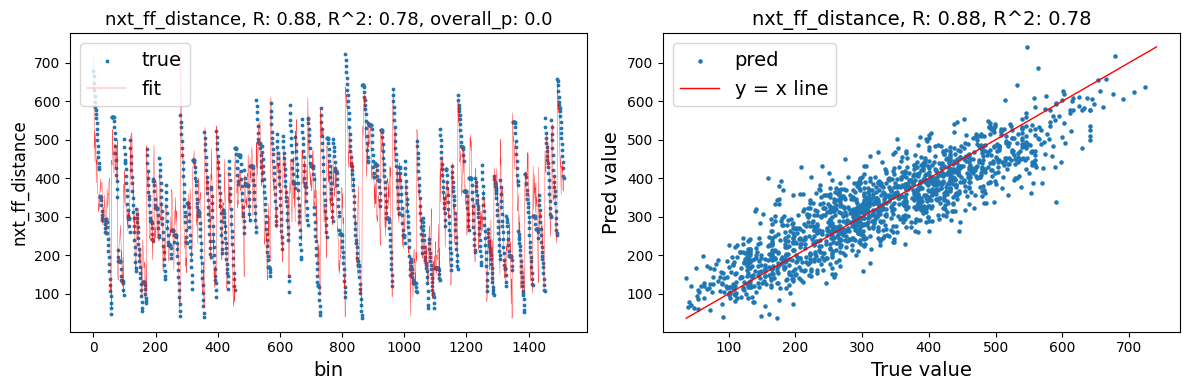

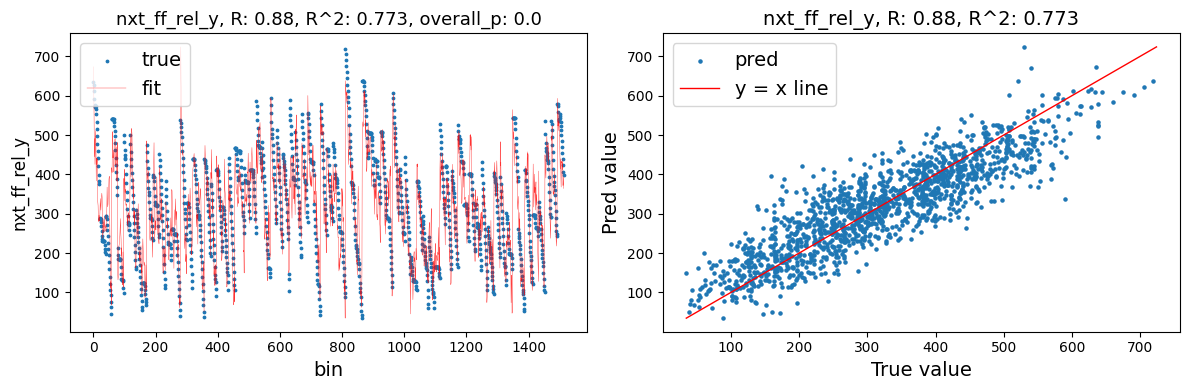

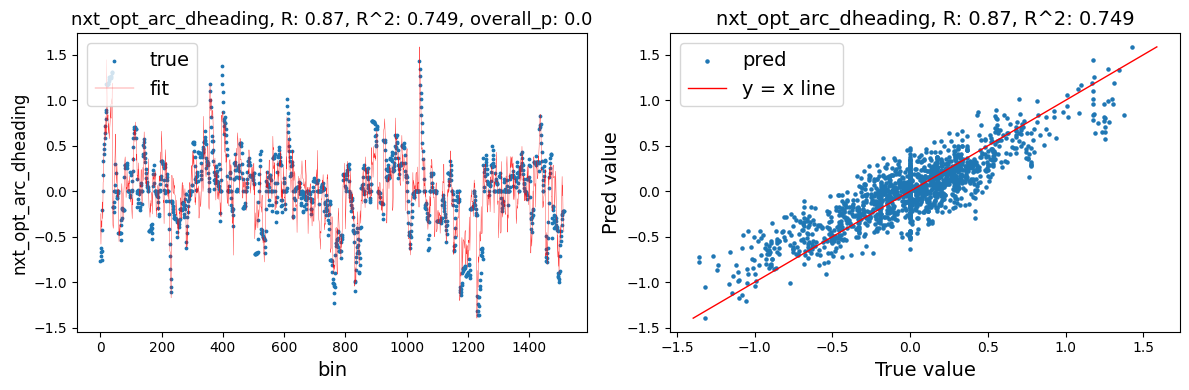

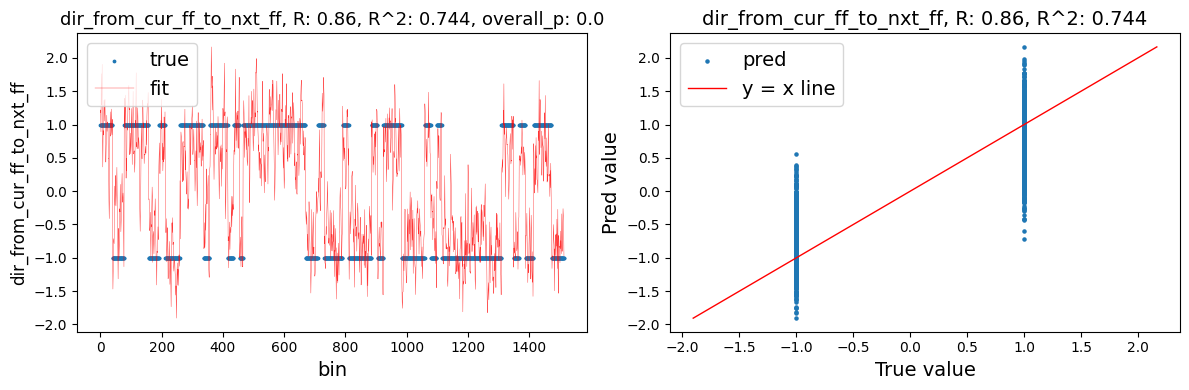

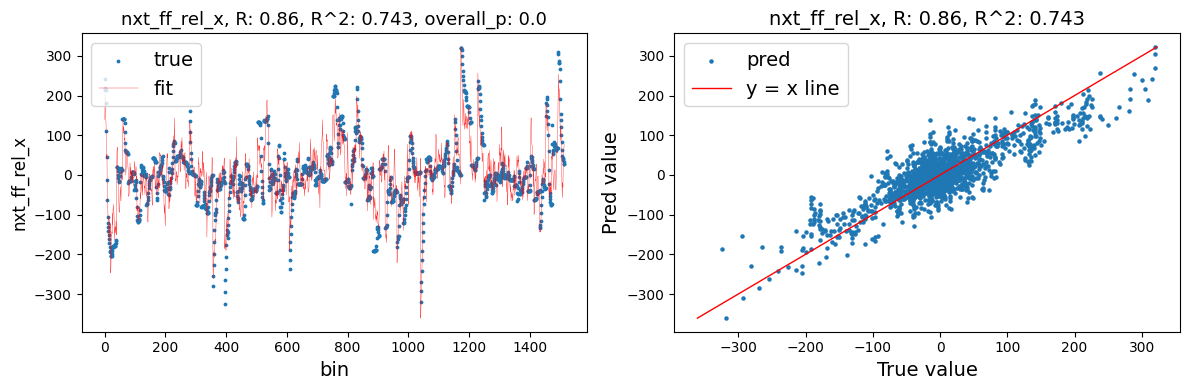

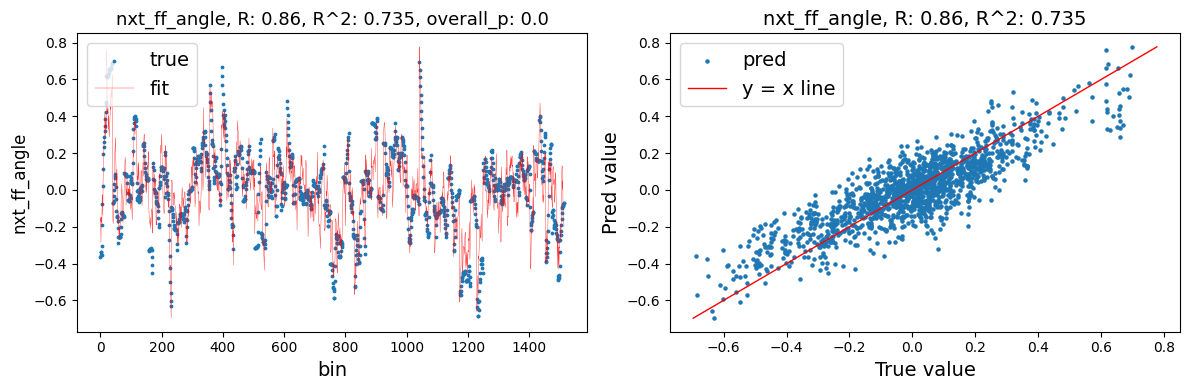

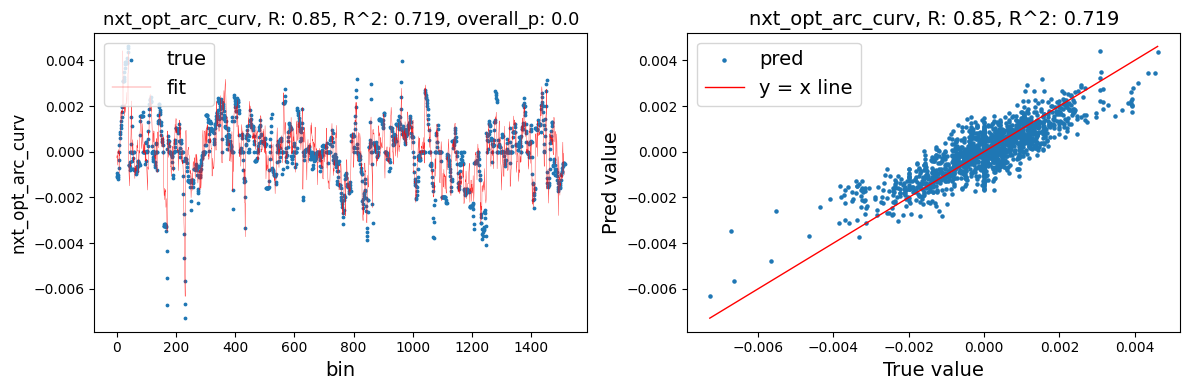

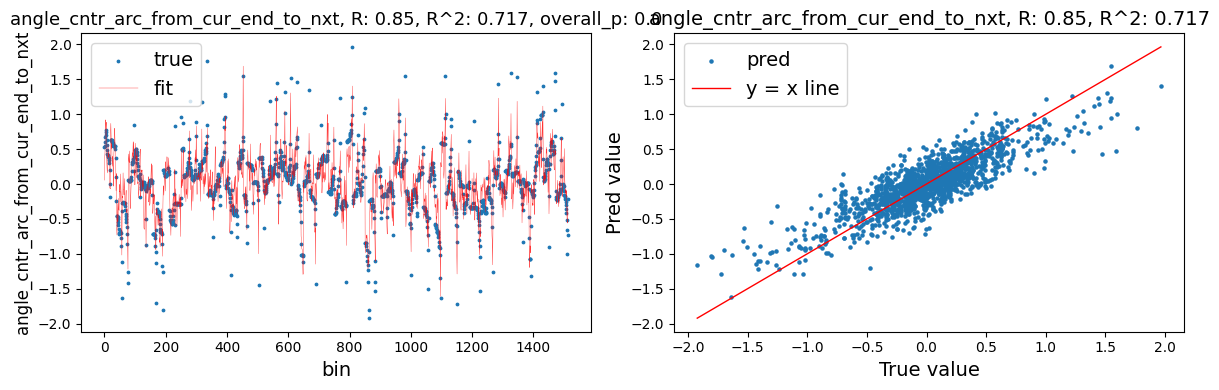

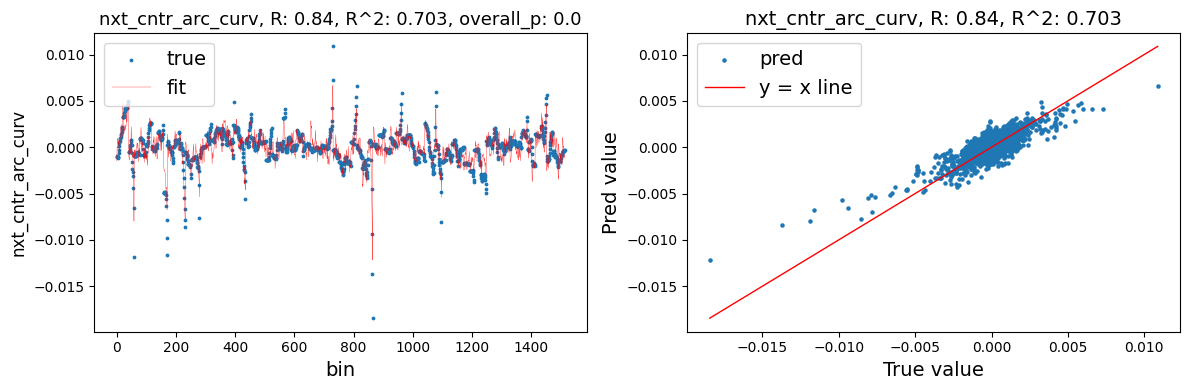

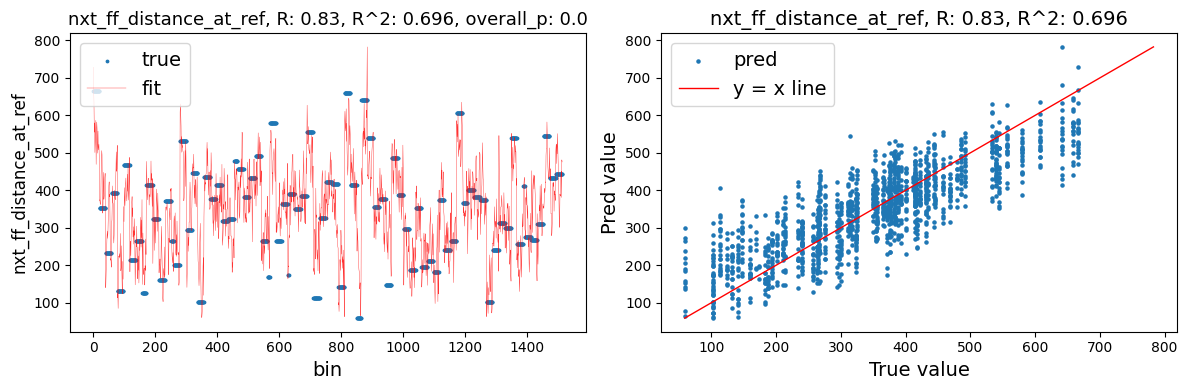

In [13]:
# Plot features from y_var_lr_df
max_plot_number = 10
count = 0
bins_to_plot = range(len(y_var))

for i, column in enumerate(y_var_lr_df.feature.values): # so that features are plotted in the order of correlation
    if i >= max_plot_number:
        break
    plot_neural_data.plot_regression(y_var, column, x_var, bins_to_plot=None, min_r_squared_to_plot=0.3)

# LR: train-test split

## regularized

In [14]:
columns_of_interest = ['whether_test']

In [15]:
reload(regz_regression_utils)

<module 'machine_learning.ml_methods.regz_regression_utils' from '/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/methods/machine_learning/ml_methods/regz_regression_utils.py'>

y_var_column: whether_test
   Model Train R2 Train Pearson Corr Train Explained Variance  Test R2  \
0  ridge   0.4834             0.6952                   0.4834  -0.6909   

  Test Pearson Corr Test Explained Variance  
0            0.0206                 -0.6090  
REGRESSION REPORT: Ridge Regression
R²: -0.6909
Explained Variance: -0.6090
Pearson Correlation on Test Data: 0.0206


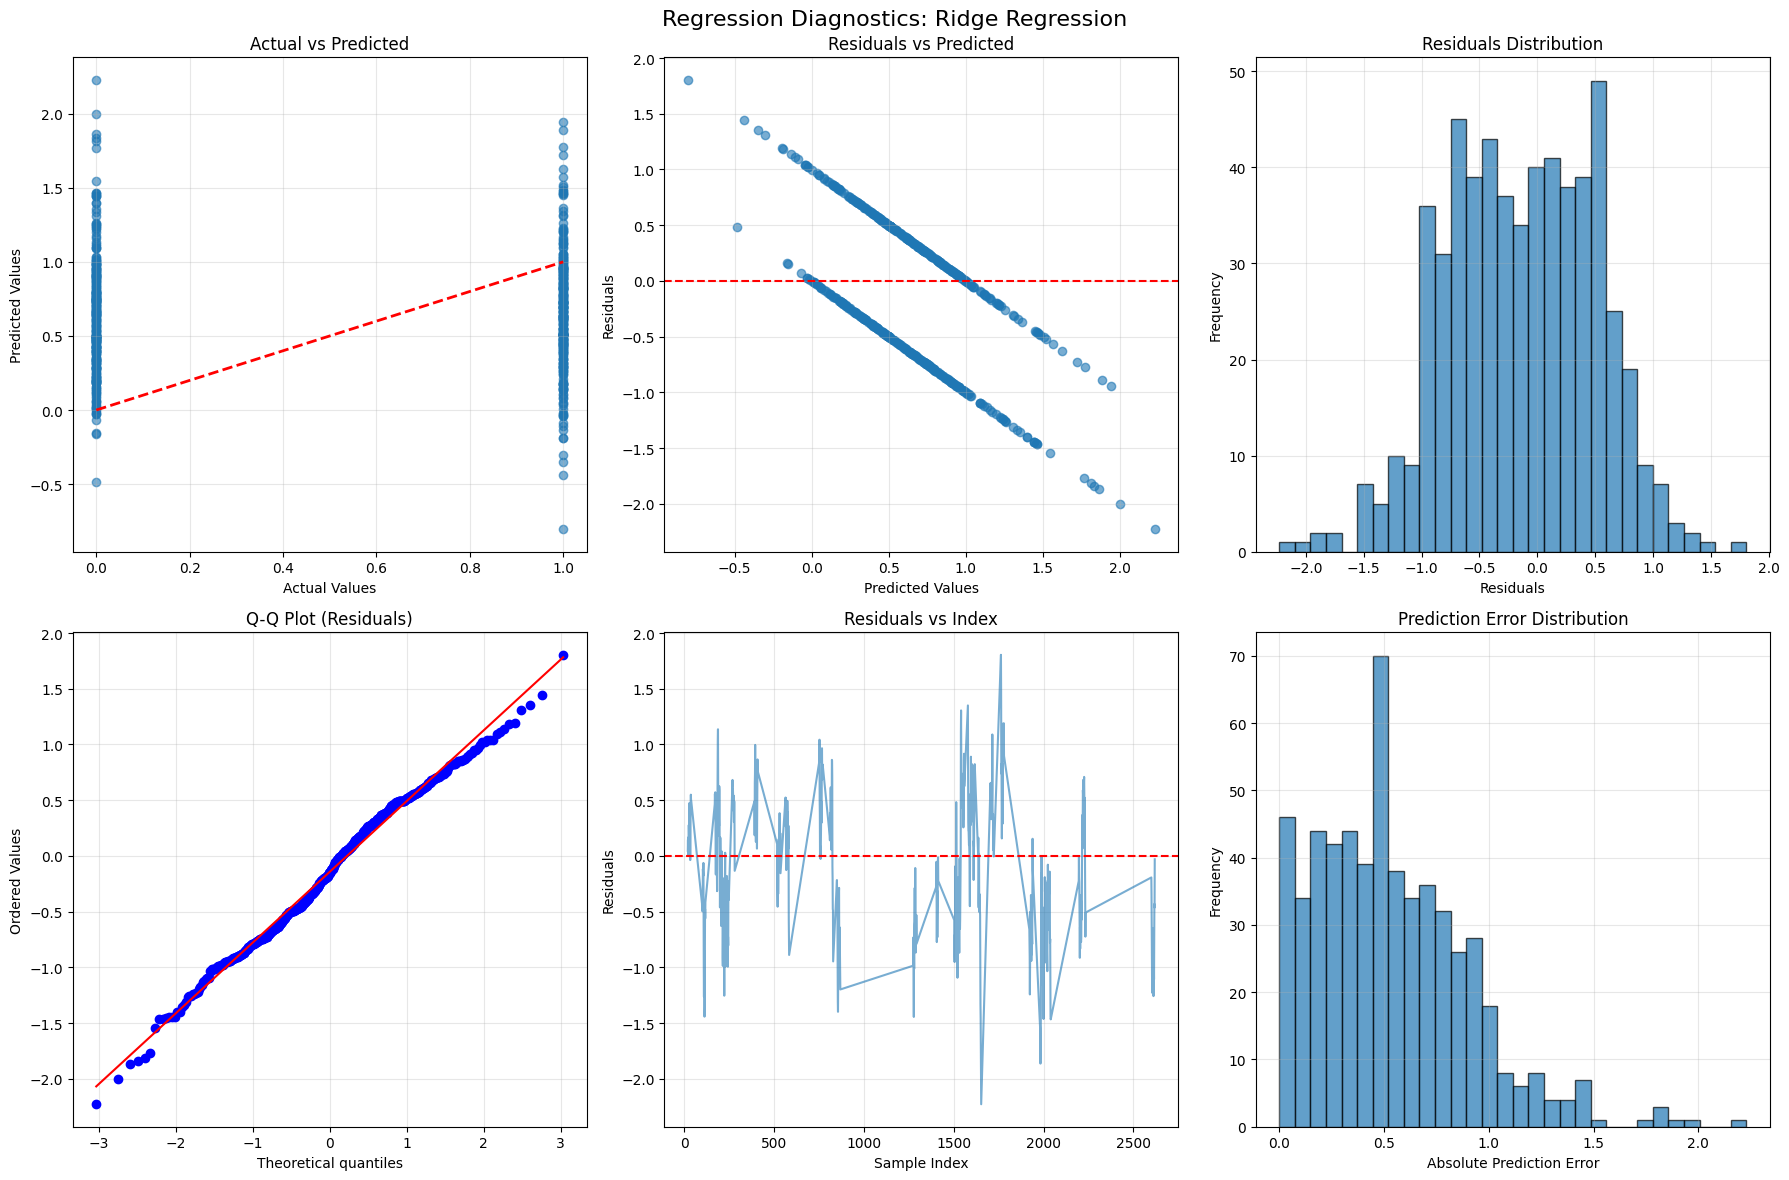

REGRESSION REPORT: OLS (no regularization) (train)
R²: 0.4834
Explained Variance: 0.4834
Pearson Correlation on Test Data: 0.6953
REGRESSION REPORT: OLS (no regularization) (test)
R²: -0.6997
Explained Variance: -0.6173
Pearson Correlation on Test Data: 0.0201


/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/methods/machine_learning/ml_methods/regz_regression_utils.py:164: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = ols_model.params[0]


REGRESSION REPORT: Ridge (train)
R²: 0.4834
Explained Variance: 0.4834
Pearson Correlation on Test Data: 0.6952
REGRESSION REPORT: Ridge (test)
R²: -0.6909
Explained Variance: -0.6090
Pearson Correlation on Test Data: 0.0206
REGRESSION REPORT: Lasso (train)
R²: 0.2322
Explained Variance: 0.2322
Pearson Correlation on Test Data: 0.5104
REGRESSION REPORT: Lasso (test)
R²: -0.0433
Explained Variance: -0.0192
Pearson Correlation on Test Data: 0.1235
REGRESSION REPORT: Elastic Net (train)
R²: 0.3373
Explained Variance: 0.3373
Pearson Correlation on Test Data: 0.5998
REGRESSION REPORT: Elastic Net (test)
R²: -0.1292
Explained Variance: -0.0945
Pearson Correlation on Test Data: 0.0704
REGRESSION REPORT: Ridge CV (train)
R²: 0.4618
Explained Variance: 0.4618
Pearson Correlation on Test Data: 0.6825
REGRESSION REPORT: Ridge CV (test)
R²: -0.3816
Explained Variance: -0.3233
Pearson Correlation on Test Data: 0.0467
REGRESSION REPORT: Lasso CV (train)
R²: 0.0120
Explained Variance: 0.0120
Pearson 

In [16]:
x_var, y_var = pn.get_x_and_y_var_for_lr(test_or_control='both', use_x_var_lags=True)
X_train, X_test, y_train, y_test = ml_methods_utils.train_test_split_based_on_segments(x_var, y_var)

# Basic usage with comprehensive metrics
for y_var_column in columns_of_interest:
    print('y_var_column:', y_var_column)
    y_train_var =  y_train[y_var_column]   
    y_test_var = y_test[y_var_column]

    results, results_df, y_pred_train, y_pred_test = regz_regression_utils.regularized_regression(
        X_train, y_train_var, X_test, y_test_var, method='ridge', alpha=1.0
    )
    print(results_df)

    # # Create comprehensive report
    report = regz_regression_utils.regression_metrics_report(
        y_test_var, y_pred_test, model_name="Ridge Regression", show_plots=True
    )
        
    results, results_df = regz_regression_utils.compare_regularized_models(X_train, y_train_var, X_test, y_test_var, verbose=True, show_plots=False)
    regz_regression_utils.print_model_comparison_summary(results)
    

## split based on targets

In [17]:
# select 'random_dummy'
pn.y_var = pn_utils.randomly_assign_random_dummy_based_on_targets(pn.y_var)
columns_of_interest = ['random_dummy']

In [18]:
columns_of_interest = ['whether_test']

In [19]:
# select all nxt_ff variables
columns_of_interest = [col for col in pn.y_var.columns if 'nxt' in col]

In [20]:
# select all cur_ff variables
columns_of_interest = [col for col in pn.y_var.columns if 'cur' in col]

y_var_column: cur_cntr_arc_curv

--- Multiple Linear Regression: cur_cntr_arc_curv ---
R-squared (train):        0.5146
Adjusted R-squared:       0.1607
R-squared (test):         -0.9205
Pearson Corr (test):      0.1235
MAE (test):               0.0056
MSE (test):               0.0001
RMSE (test):              0.0074


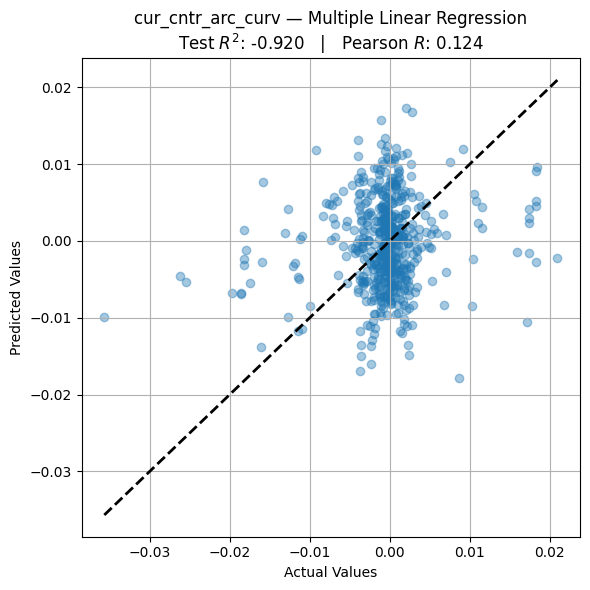

y_var_column: nxt_cntr_arc_curv

--- Multiple Linear Regression: nxt_cntr_arc_curv ---
R-squared (train):        0.5360
Adjusted R-squared:       0.1978
R-squared (test):         -0.4077
Pearson Corr (test):      0.0844
MAE (test):               0.0014
MSE (test):               0.0000
RMSE (test):              0.0022


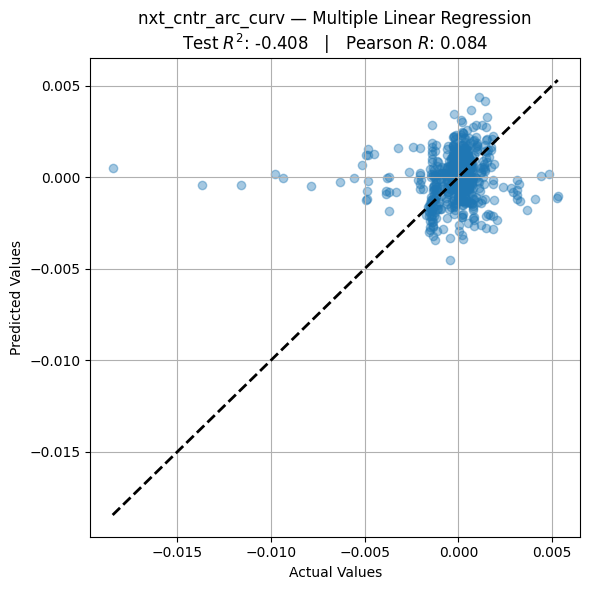

y_var_column: cur_ff_distance

--- Multiple Linear Regression: cur_ff_distance ---
R-squared (train):        0.8065
Adjusted R-squared:       0.6655
R-squared (test):         0.4816
Pearson Corr (test):      0.7225
MAE (test):               47.3342
MSE (test):               3697.8207
RMSE (test):              60.8097


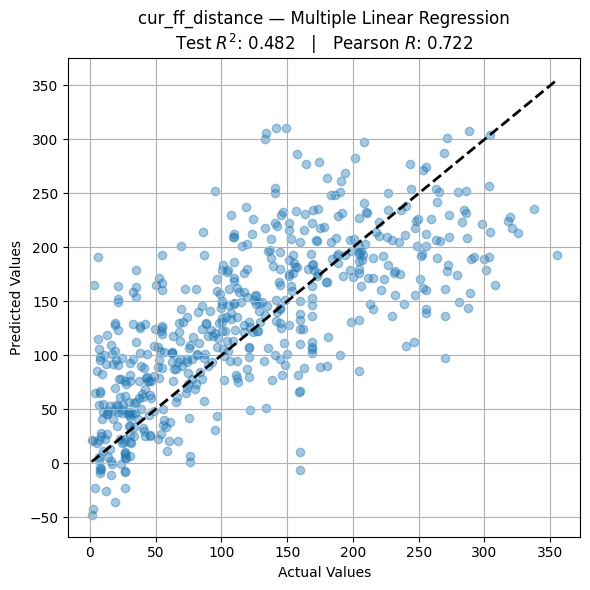

y_var_column: cur_opt_arc_dheading

--- Multiple Linear Regression: cur_opt_arc_dheading ---
R-squared (train):        0.6871
Adjusted R-squared:       0.4590
R-squared (test):         -0.3319
Pearson Corr (test):      0.4383
MAE (test):               0.1711
MSE (test):               0.0514
RMSE (test):              0.2267


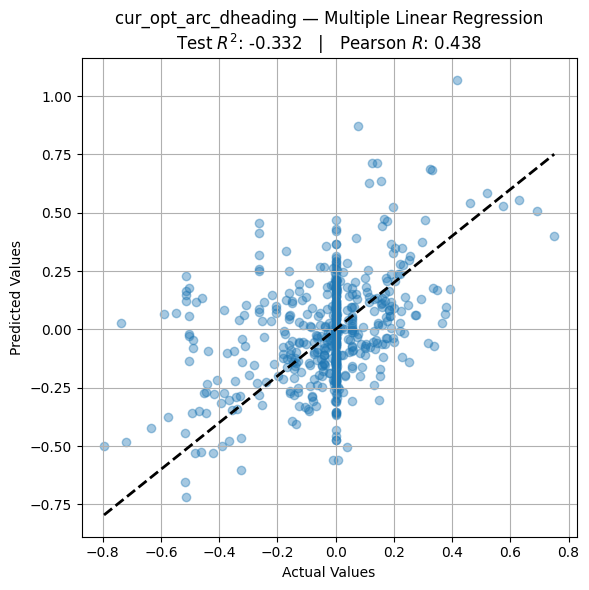

y_var_column: cur_ff_angle

--- Multiple Linear Regression: cur_ff_angle ---
R-squared (train):        0.4926
Adjusted R-squared:       0.1226
R-squared (test):         -0.5959
Pearson Corr (test):      0.0486
MAE (test):               0.3838
MSE (test):               0.3269
RMSE (test):              0.5718


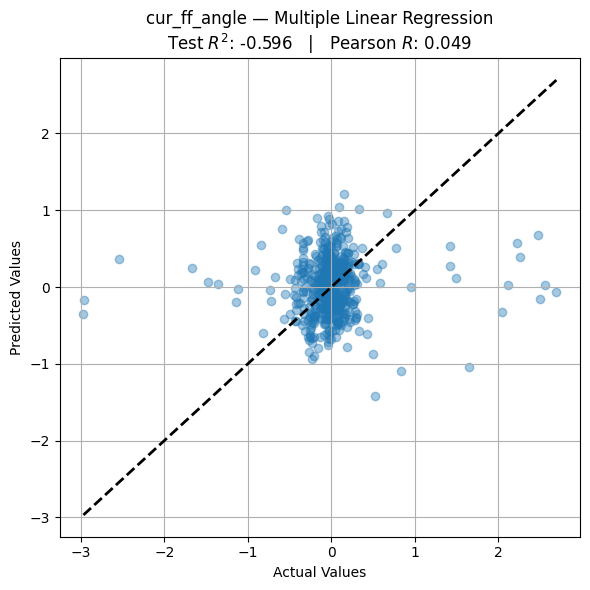

y_var_column: nxt_opt_arc_curv

--- Multiple Linear Regression: nxt_opt_arc_curv ---
R-squared (train):        0.5732
Adjusted R-squared:       0.2620
R-squared (test):         -0.6731
Pearson Corr (test):      0.1431
MAE (test):               0.0012
MSE (test):               0.0000
RMSE (test):              0.0016


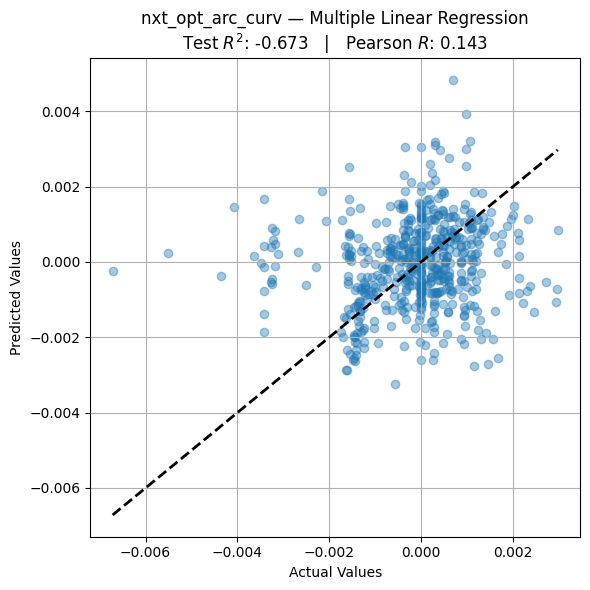

y_var_column: cur_opt_arc_curv

--- Multiple Linear Regression: cur_opt_arc_curv ---
R-squared (train):        0.5915
Adjusted R-squared:       0.2938
R-squared (test):         -0.8012
Pearson Corr (test):      0.2682
MAE (test):               0.0016
MSE (test):               0.0000
RMSE (test):              0.0021


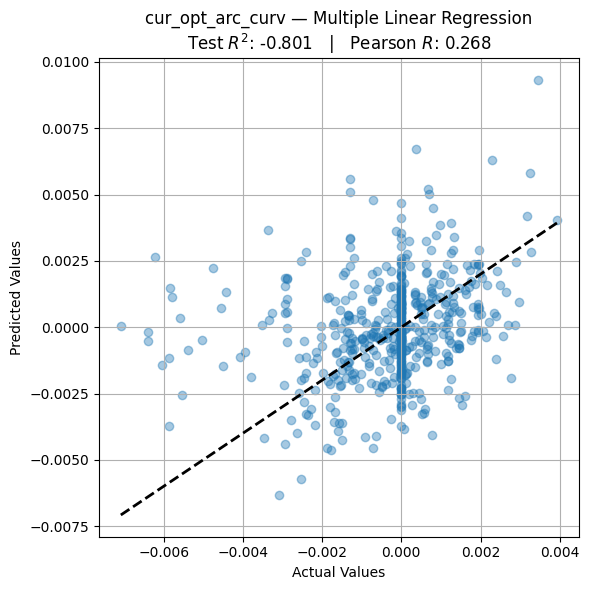

y_var_column: cur_opt_arc_end_heading

--- Multiple Linear Regression: cur_opt_arc_end_heading ---
R-squared (train):        0.4805
Adjusted R-squared:       0.1017
R-squared (test):         -0.7361
Pearson Corr (test):      0.0884
MAE (test):               2.1078
MSE (test):               6.7568
RMSE (test):              2.5994


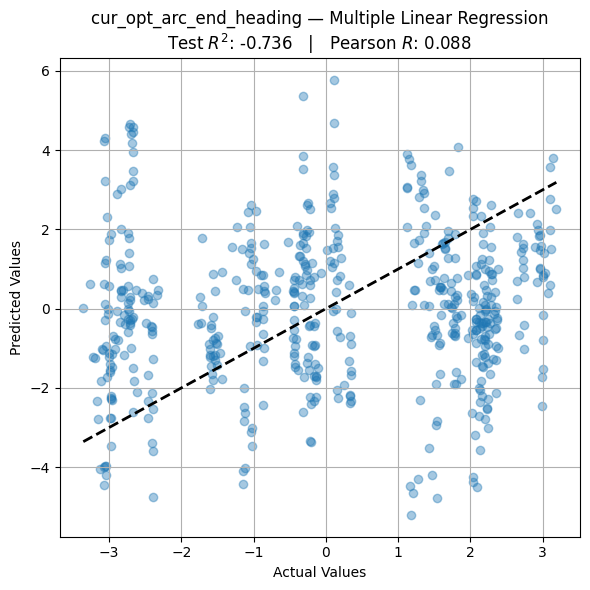

y_var_column: cur_cntr_arc_end_heading

--- Multiple Linear Regression: cur_cntr_arc_end_heading ---
R-squared (train):        0.4815
Adjusted R-squared:       0.1036
R-squared (test):         -0.8101
Pearson Corr (test):      0.0672
MAE (test):               2.1220
MSE (test):               7.0895
RMSE (test):              2.6626


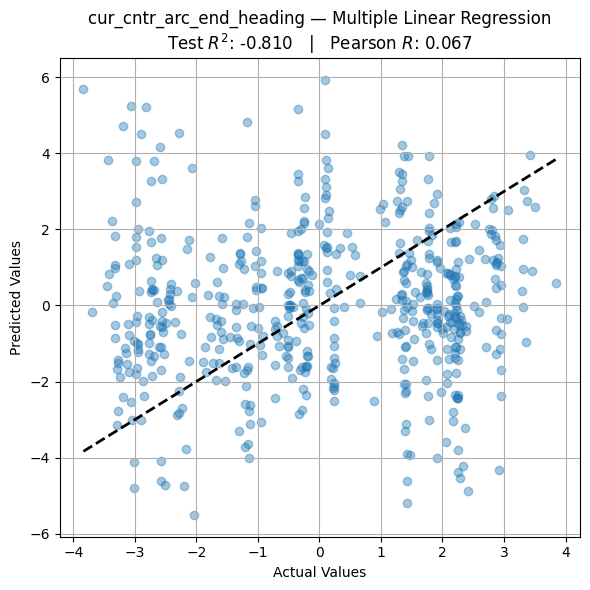

y_var_column: angle_opt_arc_from_cur_end_to_nxt

--- Multiple Linear Regression: angle_opt_arc_from_cur_end_to_nxt ---
R-squared (train):        0.4699
Adjusted R-squared:       0.0834
R-squared (test):         -0.8421
Pearson Corr (test):      0.2069
MAE (test):               0.2303
MSE (test):               0.0828
RMSE (test):              0.2878


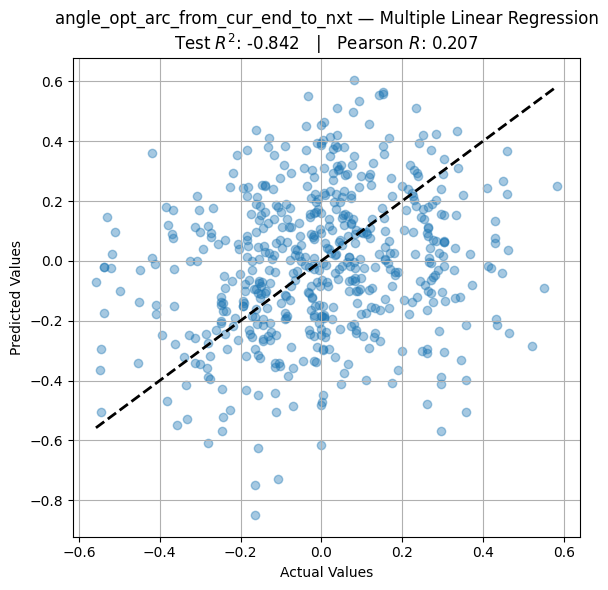

y_var_column: angle_cntr_arc_from_cur_end_to_nxt

--- Multiple Linear Regression: angle_cntr_arc_from_cur_end_to_nxt ---
R-squared (train):        0.4555
Adjusted R-squared:       0.0586
R-squared (test):         -0.6791
Pearson Corr (test):      0.0028
MAE (test):               0.4452
MSE (test):               0.3496
RMSE (test):              0.5913


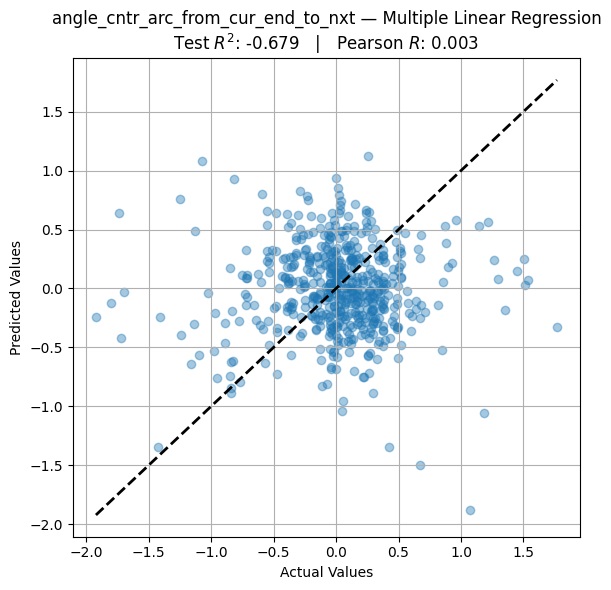

y_var_column: cur_ff_rel_x

--- Multiple Linear Regression: cur_ff_rel_x ---
R-squared (train):        0.6949
Adjusted R-squared:       0.4725
R-squared (test):         -0.2458
Pearson Corr (test):      0.4594
MAE (test):               17.5393
MSE (test):               541.3227
RMSE (test):              23.2663


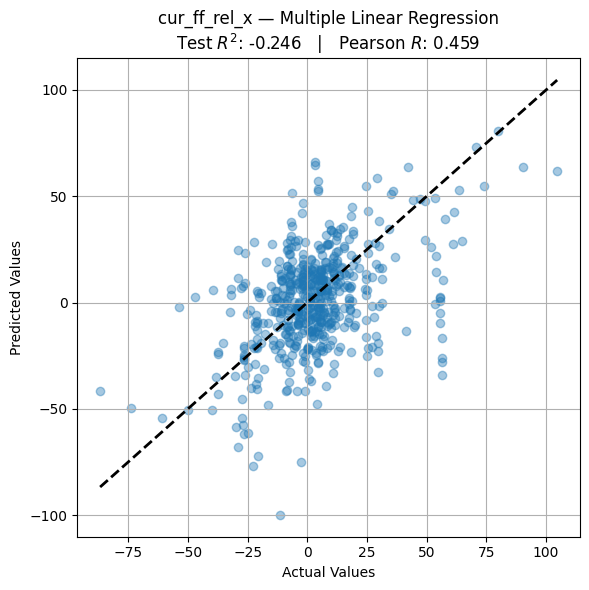

y_var_column: cur_ff_rel_y

--- Multiple Linear Regression: cur_ff_rel_y ---
R-squared (train):        0.8038
Adjusted R-squared:       0.6608
R-squared (test):         0.4863
Pearson Corr (test):      0.7216
MAE (test):               46.9863
MSE (test):               3661.6933
RMSE (test):              60.5119


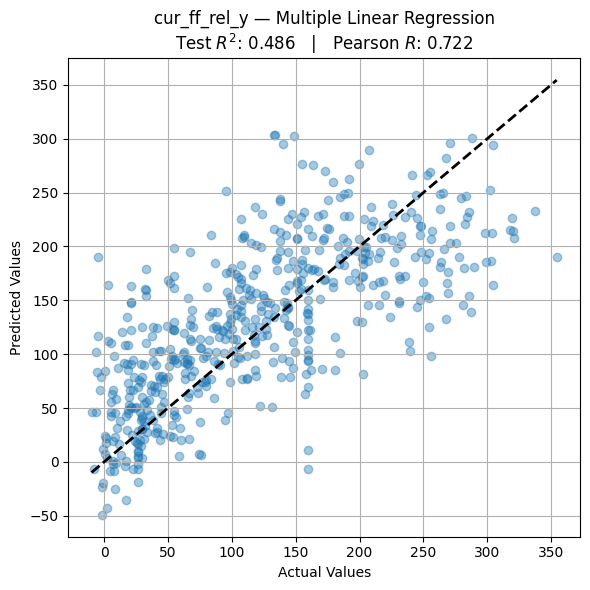

y_var_column: traj_curv

--- Multiple Linear Regression: traj_curv ---
R-squared (train):        0.6553
Adjusted R-squared:       0.4041
R-squared (test):         -0.4944
Pearson Corr (test):      0.2874
MAE (test):               0.0015
MSE (test):               0.0000
RMSE (test):              0.0020


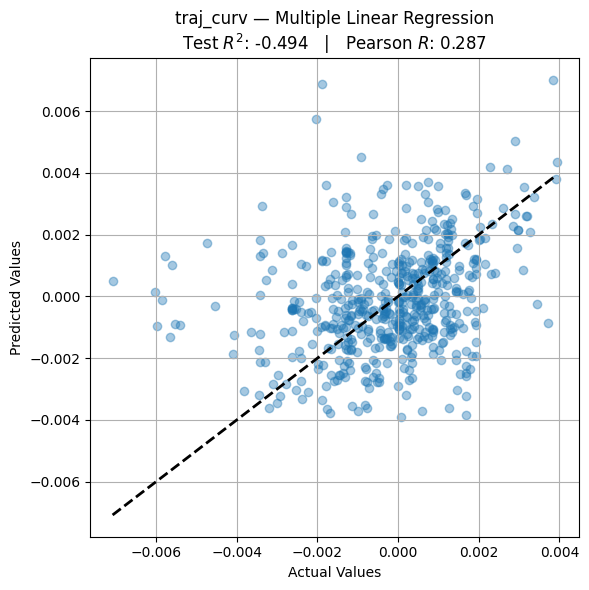

y_var_column: angle_from_m_before_stop_to_cur_ff

--- Multiple Linear Regression: angle_from_m_before_stop_to_cur_ff ---
R-squared (train):        0.4826
Adjusted R-squared:       0.1053
R-squared (test):         -0.7319
Pearson Corr (test):      0.0330
MAE (test):               2.3159
MSE (test):               7.9229
RMSE (test):              2.8148


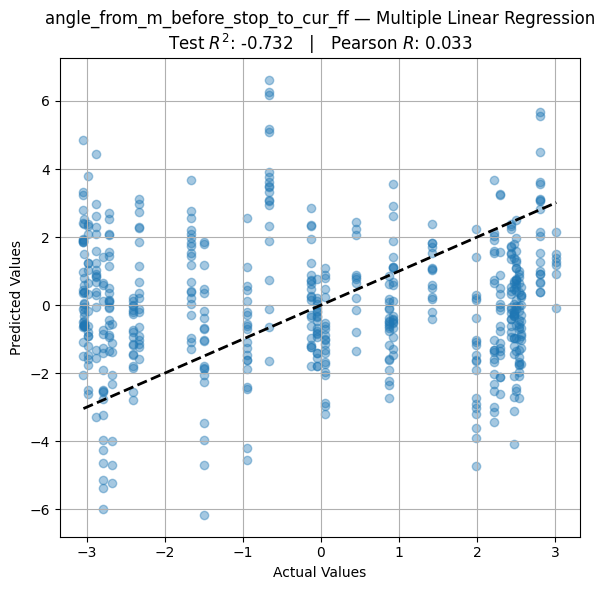

y_var_column: dir_from_cur_ff_to_stop


/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[146 118]
 [129 151]]
Accuracy: 0.5459558823529411
y_var_column: dir_from_cur_ff_to_nxt_ff


/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[142 102]
 [110 190]]
Accuracy: 0.6102941176470589
y_var_column: dir_from_cur_ff_same_side


/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[ 70  86]
 [127 261]]
Accuracy: 0.6084558823529411
y_var_column: angle_from_cur_ff_to_stop

--- Multiple Linear Regression: angle_from_cur_ff_to_stop ---
R-squared (train):        0.4916
Adjusted R-squared:       0.1209
R-squared (test):         -1.5112
Pearson Corr (test):      -0.1799
MAE (test):               1.9186
MSE (test):               6.1701
RMSE (test):              2.4840


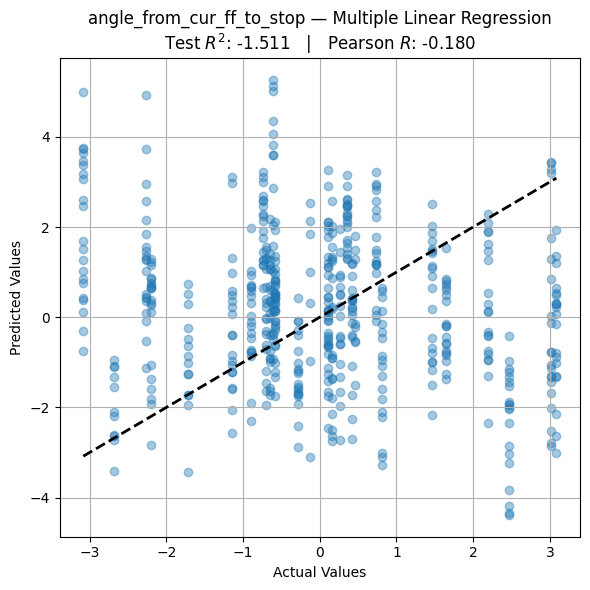

y_var_column: angle_from_cur_ff_to_nxt_ff

--- Multiple Linear Regression: angle_from_cur_ff_to_nxt_ff ---
R-squared (train):        0.4422
Adjusted R-squared:       0.0356
R-squared (test):         -0.4368
Pearson Corr (test):      0.2376
MAE (test):               0.2156
MSE (test):               0.0730
RMSE (test):              0.2702


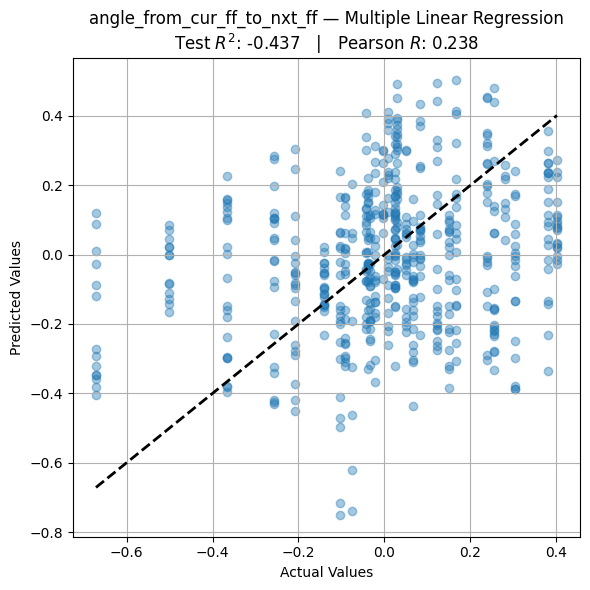

y_var_column: cur_ff_distance_at_ref

--- Multiple Linear Regression: cur_ff_distance_at_ref ---
R-squared (train):        0.5218
Adjusted R-squared:       0.1732
R-squared (test):         -0.9216
Pearson Corr (test):      -0.0293
MAE (test):               83.8348
MSE (test):               10210.3536
RMSE (test):              101.0463


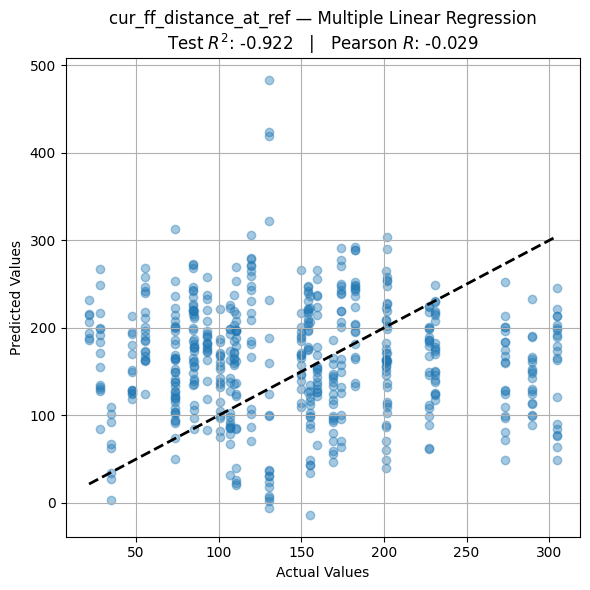

y_var_column: cur_ff_angle_at_ref

--- Multiple Linear Regression: cur_ff_angle_at_ref ---
R-squared (train):        0.5814
Adjusted R-squared:       0.2763
R-squared (test):         -1.4289
Pearson Corr (test):      0.2313
MAE (test):               0.2122
MSE (test):               0.0755
RMSE (test):              0.2748


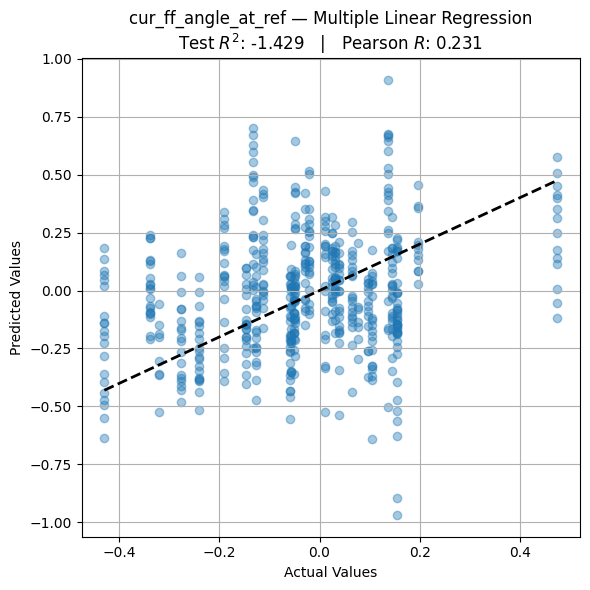

y_var_column: cur_ff_angle_boundary_at_ref

--- Multiple Linear Regression: cur_ff_angle_boundary_at_ref ---
R-squared (train):        0.5539
Adjusted R-squared:       0.2287
R-squared (test):         -0.4764
Pearson Corr (test):      0.3198
MAE (test):               0.0958
MSE (test):               0.0159
RMSE (test):              0.1260


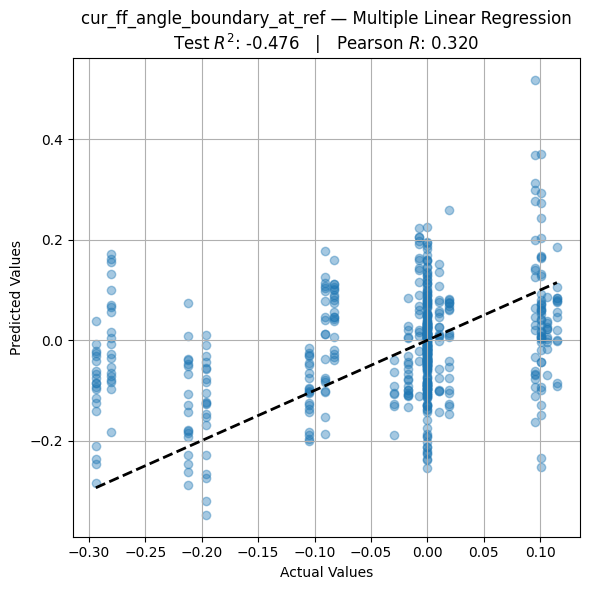

y_var_column: curv_range

--- Multiple Linear Regression: curv_range ---
R-squared (train):        0.4647
Adjusted R-squared:       0.0745
R-squared (test):         -1.5168
Pearson Corr (test):      0.0368
MAE (test):               13.5551
MSE (test):               284.9942
RMSE (test):              16.8818


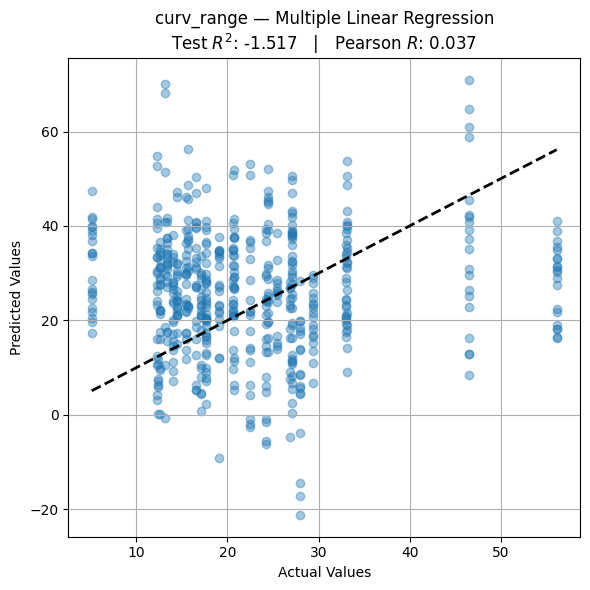

y_var_column: curv_iqr

--- Multiple Linear Regression: curv_iqr ---
R-squared (train):        0.4681
Adjusted R-squared:       0.0803
R-squared (test):         -0.5390
Pearson Corr (test):      -0.0475
MAE (test):               5.9906
MSE (test):               55.0522
RMSE (test):              7.4197


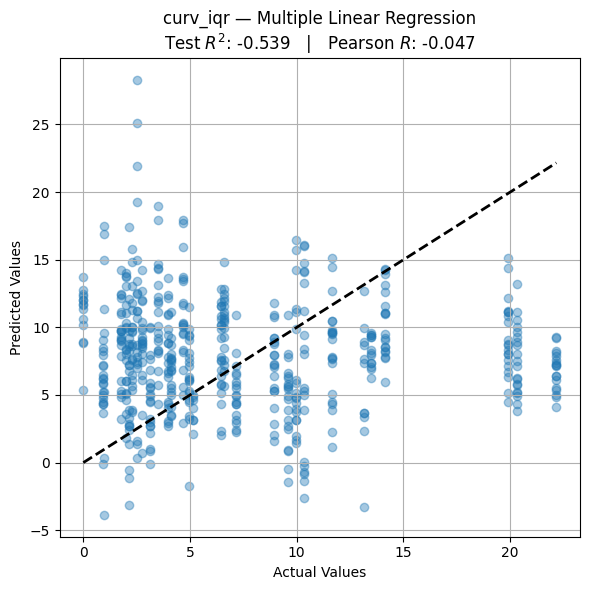

y_var_column: cur_ff_cluster_50_size

--- Multiple Linear Regression: cur_ff_cluster_50_size ---
R-squared (train):        0.4596
Adjusted R-squared:       0.0657
R-squared (test):         -1.4924
Pearson Corr (test):      -0.1251
MAE (test):               0.8078
MSE (test):               1.0114
RMSE (test):              1.0057


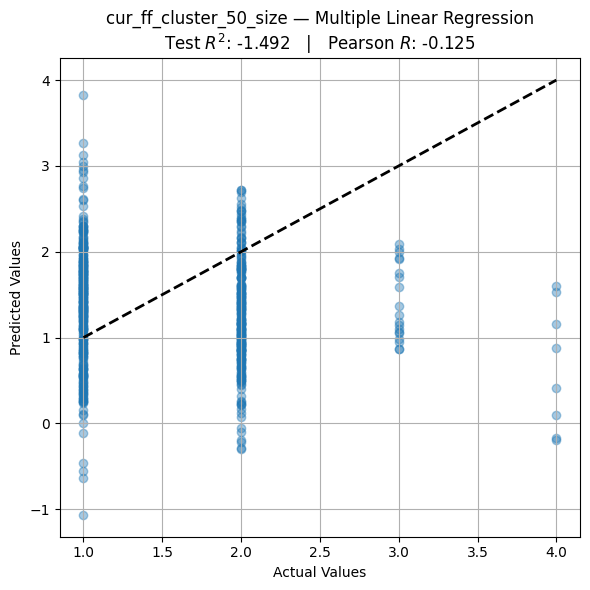

y_var_column: rel_cur_ff_last_seen_time_bbas

--- Multiple Linear Regression: rel_cur_ff_last_seen_time_bbas ---
R-squared (train):        0.5040
Adjusted R-squared:       0.1423
R-squared (test):         -1.3804
Pearson Corr (test):      0.1268
MAE (test):               0.4485
MSE (test):               0.3506
RMSE (test):              0.5921


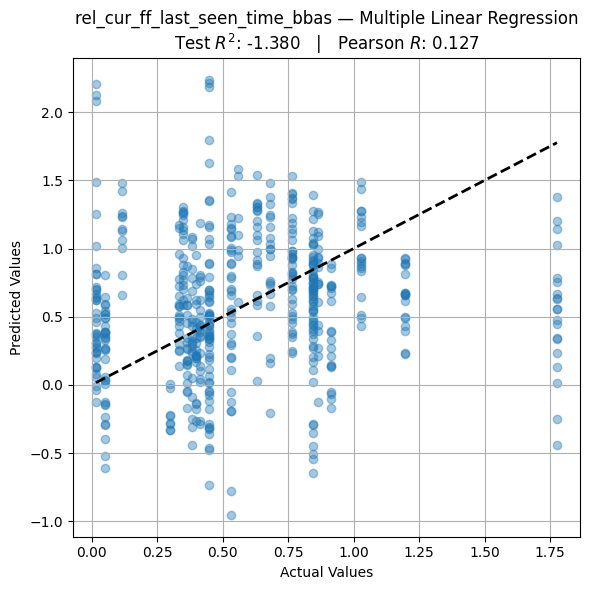

y_var_column: rel_cur_ff_first_seen_time_bbas

--- Multiple Linear Regression: rel_cur_ff_first_seen_time_bbas ---
R-squared (train):        0.4569
Adjusted R-squared:       0.0610
R-squared (test):         -1.2527
Pearson Corr (test):      -0.1807
MAE (test):               0.6073
MSE (test):               0.5266
RMSE (test):              0.7257


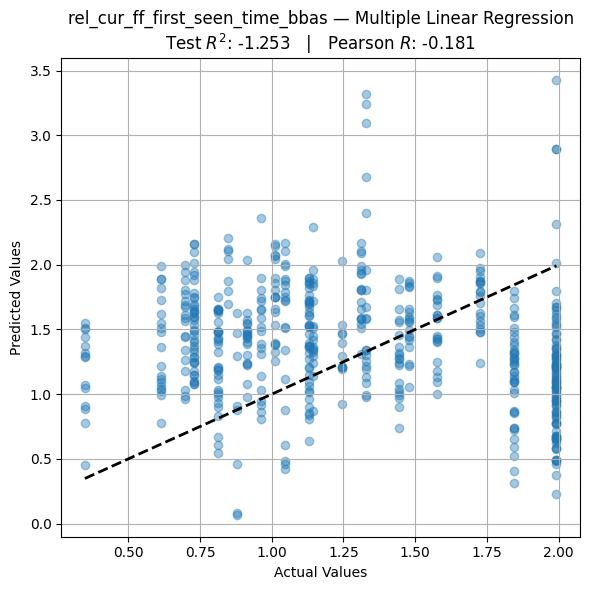

In [22]:
x_var, y_var = pn.get_x_and_y_var_for_lr(test_or_control='both', use_x_var_lags=True)
ml_methods_utils.run_segment_split_regression(x_var, y_var, columns_of_interest, segment_column='segment')

## random split

In [ ]:
x_var, y_var = pn.get_x_and_y_var_for_lr(test_or_control='both', use_x_var_lags=True)

columns_of_interest = [col for col in pn.y_var.columns if 'nxt' in col]

ml_inst = ml_methods_class.MlMethods()
for y_var_column in columns_of_interest:
    print('y_var_column:', y_var_column)
    ml_inst.split_and_use_linear_regression(pn.x_var_lags_reduced, pn.y_var[[y_var_column]])


# CCA

https://medium.com/@pozdrawiamzuzanna/canonical-correlation-analysis-simple-explanation-and-python-example-a5b8e97648d2

## conduct cca

In [ ]:
cca_no_lag = cca_class.CCAclass(X1=pn.x_var_reduced, X2=pn.y_var_reduced, lagging_included=False)
cca_no_lag.conduct_cca()

cca_lags = cca_class.CCAclass(X1=pn.x_var_lags_reduced.drop(columns='bin', errors='ignore'), X2=pn.y_var_lags_reduced, lagging_included=True)
# for all columns that end with _0, rename them to the column name without the _0
cca_lags.X2.columns = cca_lags.X2.columns.str.replace('_0', '')
cca_lags.conduct_cca()


print(f'pn.x_var_lags.shape: {pn.x_var_lags.shape}')
print(f'pn.y_var_lags_reduced.shape: {pn.y_var_lags_reduced.shape}')

cca_inst = cca_lags

## compare lag vs no lag

In [ ]:
can_load_df = pd.DataFrame(cca_no_lag.canon_corr, columns = ['no_lag'])
can_load_df[f'with_lags'] = cca_lags.canon_corr
can_load_df['component'] = [f'CC {i+1}' for i in range(cca_lags.n_components)]
# convert can_load_df to long format
can_load_df_long = pd.melt(can_load_df, id_vars=['component'], var_name='lag', value_name='canon_coeff')

In [ ]:
# make a sns bar plot on can_load_df_long
plt.figure(figsize=(8, 6))
sns.barplot(x='component', y='canon_coeff', data=can_load_df_long, hue='lag')
plt.show()

## cca_inst (choose one between lags and no lag)

In [ ]:
# choose no lag
cca_inst = cca_no_lag

In [ ]:
# choose lags
cca_inst = cca_lags

## test for p values

In [ ]:
cca_inst.test_for_p_values()

# Heatmap of loadings

## X1 loadings

In [ ]:
# cca_inst.plot_X1_loadings()

## X2 loadings

In [ ]:
reload(ml_plotting_utils)
reload(cca_plotting)
reload(cca_class)

In [ ]:
pn.y_var_lags_reduced.columns

In [ ]:
cca_inst.plot_X2_loadings()

# Canonical Variate scatterplots

In [ ]:
components=range(1, 5)
cca_plotting.plot_cca_component_scatter(cca_inst.X1_c, cca_inst.X2_c, components=components, show_y_eq_x=True)


# Transform vars (e.g. use basis functions)

In [ ]:
cca_no_lag.X2_tf_df = transform_vars.transform_behav_data(cca_no_lag.X2)
cca_lags.X2_tf_df = transform_vars.transform_behav_data(cca_lags.X2)

In [ ]:
# If need to use the data
cca_inst = cca_lags
X1_df = cca_inst.X1_sc_df
X2_df = cca_inst.X2_tf_df


# Lags vs no lag & train vs test

## Get data

In [ ]:
combined_cross_view_df, combined_can_load_df = cca_cv_utils.combine_cv_results(cca_no_lag, cca_lags, n_components=7, reg=0.1, n_splits=7)

## cross-view X1

In [ ]:
# dataset_name = 'X1'
# cross_view_sub = combined_cross_view_df[combined_cross_view_df['dataset'] == dataset_name]
# cca_plot_lag_vs_no_lag.plot_cca_lag_vs_nolag_and_train_vs_test(cross_view_sub, dataset_name, mode='lag_offset')


## cross-view X2

In [ ]:
dataset_name = 'X2'
cross_view_sub = combined_cross_view_df[combined_cross_view_df['dataset'] == dataset_name]
cca_plot_lag_vs_no_lag.plot_cca_lag_vs_nolag_and_train_vs_test(cross_view_sub, dataset_name, mode='lag_offset')


# Just train vs test

## cross-view X1

In [ ]:
# filter_significant = True
# sort_by_significance = True
# significance_threshold = 4
# whether_lag = 'lag'

# combined_cross_view_df_sub = combined_cross_view_df[combined_cross_view_df['whether_lag'] == whether_lag]

# # X1
# cca_plot_cv.plot_cca_cv_results(combined_cross_view_df_sub, data_type='X1',
#                                     filter_significant=filter_significant, sort_by_significance=sort_by_significance, significance_threshold=significance_threshold)


## cross-view X2

In [ ]:
filter_significant = True
sort_by_significance = True
significance_threshold = 1
whether_lag = 'lag'

combined_cross_view_df_sub = combined_cross_view_df[combined_cross_view_df['whether_lag'] == whether_lag]

# X2
cca_plot_cv.plot_cca_cv_results(combined_cross_view_df_sub, data_type='X2',
                                    filter_significant=filter_significant, sort_by_significance=sort_by_significance, significance_threshold=significance_threshold)


# Appendix

## reduce y_var only by vif

In [ ]:
pn.reduce_y_var(save_data=True,
                     corr_threshold_for_lags_of_a_feature=0.97,
                     vif_threshold_for_initial_subset=5, vif_threshold=5, verbose=True,
                     filter_corr_by_all_columns=False,
                     filter_vif_by_subsets=False,
                     filter_vif_by_all_columns=True,
                     exists_ok=False,
                     )

## check final VIF

In [ ]:
vif_df = drop_high_vif_vars.get_vif_df(pn.y_var_reduced)
vif_df

In [ ]:
vif_df = drop_high_vif_vars.get_vif_df(pn.y_var_lags_reduced)
vif_df

## check correlations in y_var_lags

In [ ]:
# sort pn.y_var_lags by column str a to z
pn.y_var_lags2 = pn.y_var_lags.reindex(sorted(pn.y_var_lags.columns), axis=1)

# # sort pn.y_var_lags by column str z to a
# pn.y_var_lags_reduced = pn.y_var_lags_reduced.reindex(sorted(pn.y_var_lags_reduced.columns, reverse=True), axis=1)

In [ ]:
pn.y_var_lags2.iloc[:, :10]

In [ ]:
pn.y_var_lags2.iloc[:, :10].corr()

## check high corr within feature's lagged columns

In [ ]:
df_with_lags = pn.y_var_lags2.copy()
num_original_columns = len(df_with_lags.columns)
base_features = drop_high_corr_vars.get_base_feature_names(df_with_lags)
columns_dropped = []
top_values_by_feature = pd.DataFrame()
for i, feature in enumerate(base_features):
    df_with_lags_sub = drop_high_corr_vars._find_subset_of_df_with_lags_for_current_feature(
        df_with_lags, feature)
    # temp_columns_to_drop, top_values_of_feature = drop_high_corr_vars._drop_lags_for_feature(
    #     df_with_lags, feature, corr_threshold, vif_threshold, use_vif_instead_of_corr, drop_lag_0_last_in_vif)
    if df_with_lags_sub.corr().iloc[1,2] == 1:
        print(feature)

## Compare columns in behav_data (target_decoder) and final_behavioral_data (neural_vs_behavioral_class)

In [ ]:
pn.get_behav_data(exists_ok=False)

In [ ]:
data_item = neural_vs_behavioral_class.NeuralVsBehavioralClass(raw_data_folder_path=raw_data_folder_path)
data_item.streamline_preparing_neural_and_behavioral_data()

In [ ]:
# Columns in pn.behav_data_by_bin but not in data_item.final_behavioral_data
only_in_pn = set(pn.behav_data_by_bin.columns) - set(data_item.final_behavioral_data.columns)
print("Columns only in pn.behav_data_by_bin:")
only_in_pn = np.array(sorted(only_in_pn))
print(only_in_pn)
print('\n \n')

# Columns in data_item.final_behavioral_data but not in pn.behav_data_by_bin
final_behavioral_data_columns = data_item.final_behavioral_data.columns
# remove all 'avg_bin_' prefix
final_behavioral_data_columns = [col.replace('avg_bin_', '') for col in final_behavioral_data_columns]
only_in_data_item = set(final_behavioral_data_columns) - set(pn.behav_data_by_bin.columns)
print("Columns only in data_item.final_behavioral_data:")
only_in_data_item = np.array(sorted(only_in_data_item))
print(only_in_data_item)

In [ ]:
pn.cur_and_nxt_ff_from_ref_df.columns

In [ ]:
pn.test_plan_data_inst.df.columns

## just get planning_timestep_data

In [ ]:
planning_data_by_point_exists_ok = False

raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0330"
ref_point_mode='time after cur ff visible'
ref_point_value=0.1
normalize = False
eliminate_outliers = False
use_curv_to_ff_center = False
curv_of_traj_mode = 'distance'
window_for_curv_of_traj=[-25, 25]
truncate_curv_of_traj_by_time_of_capture = True

   # get behavioral_data
ph = pn_helper_class.PlanningAndNeuralHelper(raw_data_folder_path=raw_data_folder_path)

ph.load_raw_data(raw_data_folder_path)
ph.prep_behav_data_to_analyze_planning(ref_point_mode=ref_point_mode,
                                                            ref_point_value=ref_point_value,
                                                            curv_of_traj_mode=curv_of_traj_mode,
                                                            window_for_curv_of_traj=window_for_curv_of_traj,
                                                            truncate_curv_of_traj_by_time_of_capture=truncate_curv_of_traj_by_time_of_capture,
                                                            use_curv_to_ff_center=use_curv_to_ff_center,
                                                            eliminate_outliers=eliminate_outliers,
                                                            planning_data_by_point_exists_ok=planning_data_by_point_exists_ok
                                                            )